# Vendor Risk Management Program: Managment Reporting
### This program uses a sample excel file to import data and perform some analysis and visualization of categorical data. The goal of this program is to generate data for use in vendor risk management reports at the program level, risk assessment level and vendor level (aggregation of vendor contracts), and perform risk scoring of the vendors, calculate the accuracy, precision, recall of the model using the classification report in sklearn

#### Import Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import plotly.tools as tls
import chart_studio
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport
import random
from vrm_db import insert_servicetype, insert_contractscoring, insert_vendorscoring, insert_enhancedoversight, insert_scoringmodel

#### Read Excel Source Files

In [166]:
# Read VRM Program Data
# The program data provides a high level over of the vrm program; it shows vendor and contract specific information, length of service, geographic information, contract value, service risk score,
# contract compliane with respect to KPIs, open audit, regulatory and assessment issues, etc...
program_data = pd.read_excel('vrm_program_reporting.xlsx')
program_data.head()

,Vendor,Service Type,Contract ID,Service Inception,Region,Country,Contract Value,Service Risk Score,Service Risk Rating,Alternate Vendor,Reassessment Date,Reassessment Completion,Reassessment Status,Days Until Reassessment Completion,KPIs Measured,Contract Compliance Risk,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings
0,Vend-87,Software Packages,Con-101,2019-11-01,North America,USA,32139,12.0,High,No,2020-10-31,2020-11-30,Complete,Complete,No,Unknown - KPIs Not Measured,4,3,1
1,Vend-61,Insurance,Con-102,2019-05-13,Europe,Germany,90695,10.5,High,No,2020-05-12,2020-06-11,Complete,Complete,No,Unknown - KPIs Not Measured,2,3,2
2,Vend-98,Hardware,Con-103,2019-04-05,South America,Mexico,108545,8.0,Medium,Not Required,2021-04-04,2021-05-04,Past Due 15 - 30 Days,-19,No,Unknown - KPIs Not Measured,5,4,0
3,Vend-54,Mail,Con-104,2020-07-08,Asia,India,23560,8.0,Medium,Not Required,2022-07-08,2022-08-07,Not Due > 30 Days,441,Yes,High,4,5,4
4,Vend-70,Technical Consulting,Con-105,2019-03-13,North America,USA,10898,9.0,Medium,Not Required,2021-03-12,2021-04-11,Complete,Complete,Yes,Low,4,1,3


In [3]:
# Read Risk Assessment Data worksheet within vrm_program_reporting.xlsx file
# This data shows the number of responses across the risk domains, total responses % of risk assessment completed and the status of the risk assessment
# The status of risk assessment include, past due 0 - 15 days, in progress - due in 15 days, past due over 30 days, in progress between 15 and 30 days, etc...
risk_assmt_data = pd.read_excel('vrm_program_reporting.xlsx', 'risk_assmts_data')
risk_assmt_data.head()

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Total Responses,Completion %,Reassessment Status
0,Vend-98,Hardware,Con-103,0,3,10,3,17,27,26,4,90,0.391304,Past Due 0 - 15 Days
1,Vend-76,Stationary,Con-107,0,0,9,5,26,40,16,5,101,0.439130,In Progress - Due in < 15 Days
2,Vend-50,Software Packages,Con-123,3,6,2,1,53,45,23,7,140,0.608696,Past Due > 30 Days
3,Vend-91,Administrative Support,Con-131,1,6,7,1,22,14,27,6,84,0.365217,In Progress - Due 15 - 30 Days
4,Vend-64,Stationary,Con-138,0,8,8,7,55,15,5,2,100,0.434783,Past Due > 30 Days


In [4]:
risk_assmt_data.tail()

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Total Responses,Completion %,Reassessment Status
6,Vend-79,Technical Consulting,Con-158,6,10,8,7,11,30,11,4,87,0.378261,In Progress - Due 15 - 30 Days
7,Vend-52,Mail,Con-173,3,5,3,1,34,43,9,4,102,0.443478,In Progress - Due in < 15 Days
8,Vend-86,Software Packages,Con-182,5,1,5,4,47,37,13,10,122,0.530435,Past Due 15 - 30 Days
9,Vend-75,Insurance,Con-198,5,11,7,7,57,27,34,10,158,0.686957,In Progress - Due in < 15 Days
10,Total Questions,Total Questions,Total Questions,10,20,15,10,75,50,40,10,230,1.000000,NaN


In [5]:
# Read Risk Scoring Data
# Shows the derivation of service risk score at the contract/service level. 
# This methodology assigns 50% of the risk to strategic, reputational, financial, physical security and insurance; it assigns the remaining 50% to legal/regulatory, information security and
# information technology to derive the service/contract risk score
risk_scoring = pd.read_excel('vrm_program_reporting.xlsx', 'risk_scoring_data')
risk_scoring.head()

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Service Risk Score,Service Risk Rating,Normalized Score,Reassessment Status
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,3,12.0,High,0.75000,Complete
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,3,10.5,High,0.65625,Complete
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,4,8.0,Medium,0.50000,Past Due 15 - 30 Days
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,3,8.0,Medium,0.50000,Not Due > 30 Days
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,1,9.0,Medium,0.56250,Complete


In [6]:
# Calibration of Servie Risk Data
# This shows the ranges of the Serive Risk Score and how these align to the ratings: Low, Medium, High and Critical
# It also shows the Best Case (Lowest Risk) and Worst Case (Highest Risk) for contracts

risk_scoring.tail(2)

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Service Risk Score,Service Risk Rating,Normalized Score,Reassessment Status
100,Best Case,Best Case,Lowest Risk,1,1,1,1,1,1,1,1,4.0,Not Applicable,0.25,Not Applicable
101,Worst Case,Worst Case,Highest Risk,4,4,4,4,4,4,4,4,16.0,Not Applicable,1.00,Not Applicable


In [7]:
risk_calibration = pd.read_excel('vrm_program_reporting.xlsx', 'calibration')
risk_calibration

,Scale,inequality,numerator,percentage,rating,Explanation
0,"(0,7)",< 7,7.0,0.4375,Low,Less than 7 (or 43.75%)
1,"[7,10)",7 <= Score < 10,10.0,0.6250,Medium,Between 7 and 10 (0.4375% and 62.5%)
2,"[10,14)",10 <= Score < 14,14.0,0.8750,High,Between 10 and 14 (or 62.5% and 87.5%
3,>=14,Score >= 14,NaN,NaN,Critical,Greater than 14 (or 87.5%)


In [8]:
risk_scoring.tail()

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Service Risk Score,Service Risk Rating,Normalized Score,Reassessment Status
97,Vend-75,Insurance,Con-198,4,2,3,4,2,3,2,2,11.0,High,0.6875,Past Due 0 - 15 Days
98,Vend-84,Administrative Support,Con-199,3,2,4,1,2,3,1,2,9.0,Medium,0.5625,Not Due > 30 Days
99,Vend-64,Engineering,Con-200,4,3,4,1,1,3,4,2,11.0,High,0.6875,Complete
100,Best Case,Best Case,Lowest Risk,1,1,1,1,1,1,1,1,4.0,Not Applicable,0.2500,Not Applicable
101,Worst Case,Worst Case,Highest Risk,4,4,4,4,4,4,4,4,16.0,Not Applicable,1.0000,Not Applicable


In [9]:
# Drop the last two rows of risk_scoring dataframe
risk_scoring.drop(risk_scoring.tail(2).index, inplace = True)
risk_scoring.head()

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Service Risk Score,Service Risk Rating,Normalized Score,Reassessment Status
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,3,12.0,High,0.75000,Complete
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,3,10.5,High,0.65625,Complete
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,4,8.0,Medium,0.50000,Past Due 15 - 30 Days
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,3,8.0,Medium,0.50000,Not Due > 30 Days
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,1,9.0,Medium,0.56250,Complete


In [10]:
risk_scoring

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Service Risk Score,Service Risk Rating,Normalized Score,Reassessment Status
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,3,12.0,High,0.75000,Complete
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,3,10.5,High,0.65625,Complete
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,4,8.0,Medium,0.50000,Past Due 15 - 30 Days
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,3,8.0,Medium,0.50000,Not Due > 30 Days
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,1,9.0,Medium,0.56250,Complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vend-89,Administrative Support,Con-196,2,1,2,3,4,4,4,4,12.0,High,0.75000,Not Due > 30 Days
96,Vend-79,Mail,Con-197,2,4,1,1,4,3,2,2,9.5,Medium,0.59375,Not Due > 30 Days
97,Vend-75,Insurance,Con-198,4,2,3,4,2,3,2,2,11.0,High,0.68750,Past Due 0 - 15 Days
98,Vend-84,Administrative Support,Con-199,3,2,4,1,2,3,1,2,9.0,Medium,0.56250,Not Due > 30 Days


In [11]:
risk_scoring.tail()

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Service Risk Score,Service Risk Rating,Normalized Score,Reassessment Status
95,Vend-89,Administrative Support,Con-196,2,1,2,3,4,4,4,4,12.0,High,0.75000,Not Due > 30 Days
96,Vend-79,Mail,Con-197,2,4,1,1,4,3,2,2,9.5,Medium,0.59375,Not Due > 30 Days
97,Vend-75,Insurance,Con-198,4,2,3,4,2,3,2,2,11.0,High,0.68750,Past Due 0 - 15 Days
98,Vend-84,Administrative Support,Con-199,3,2,4,1,2,3,1,2,9.0,Medium,0.56250,Not Due > 30 Days
99,Vend-64,Engineering,Con-200,4,3,4,1,1,3,4,2,11.0,High,0.68750,Complete


#### Data Cleaning and Reprocessing

In [12]:
# Datatypes
program_data.dtypes

Vendor                                        object
Service Type                                  object
Contract ID                                   object
Service Inception                     datetime64[ns]
Region                                        object
Country                                       object
Contract Value                                 int64
Service Risk Score                           float64
Service Risk Rating                           object
Alternate Vendor                              object
Reassessment Date                     datetime64[ns]
Reassessment Completion               datetime64[ns]
Reassessment Status                           object
Days Until Reassessment Completion            object
KPIs Measured                                 object
Contract Compliance Risk                      object
Open Regulatory Findings                       int64
Open Audit Findings                            int64
Unresolved Assessment Findings                

In [13]:
risk_assmt_data.dtypes

Vendor                              object
Service Type                        object
Contract ID                         object
Strategic Risk                       int64
Legal and Regulatory Compliance      int64
Financial Risk                       int64
Reputational                         int64
Information Security                 int64
Information Technology               int64
Physical Security                    int64
Insurance Coverage                   int64
Total Responses                      int64
Completion %                       float64
Reassessment Status                 object
dtype: object

In [14]:
risk_scoring.dtypes

Vendor                              object
Service Type                        object
Contract ID                         object
Strategic Risk                       int64
Legal and Regulatory Compliance      int64
Financial Risk                       int64
Reputational                         int64
Information Security                 int64
Information Technology               int64
Physical Security                    int64
Insurance Coverage                   int64
Service Risk Score                 float64
Service Risk Rating                 object
Normalized Score                   float64
Reassessment Status                 object
dtype: object

In [15]:
# Check for missing data
program_data.isna().sum()

Vendor                                0
Service Type                          0
Contract ID                           0
Service Inception                     0
Region                                0
Country                               0
Contract Value                        0
Service Risk Score                    0
Service Risk Rating                   0
Alternate Vendor                      0
Reassessment Date                     0
Reassessment Completion               0
Reassessment Status                   0
Days Until Reassessment Completion    0
KPIs Measured                         0
Contract Compliance Risk              0
Open Regulatory Findings              0
Open Audit Findings                   0
Unresolved Assessment Findings        0
dtype: int64

In [16]:
# Check for duplicates
program_data.duplicated().sum()

0

### Data Visualization of VRM Program Data

In [17]:
# Descriptive Statistics Data
program_data.describe()

,Contract Value,Service Risk Score,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings
count,100.000000,100.00000,100.000000,100.000000,100.000000
mean,123381.020000,9.92000,2.420000,2.650000,2.070000
std,67822.374588,1.70815,1.810073,1.783057,1.584362
min,10898.000000,6.00000,0.000000,0.000000,0.000000
25%,67566.000000,8.87500,1.000000,1.000000,0.750000
50%,126764.500000,10.00000,2.000000,3.000000,2.000000
75%,171904.750000,11.00000,4.000000,4.000000,3.000000
max,244779.000000,15.00000,5.000000,5.000000,5.000000


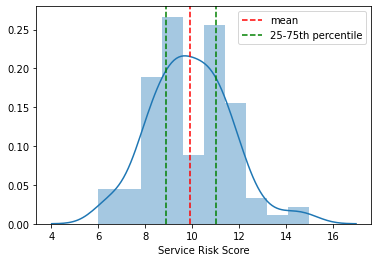

In [18]:
# Distribution of Service Risk Score
# The Average Service Risk Score is 9.92 (from the summary statistics table); the bell curve approximates to 10
sns.distplot(program_data['Service Risk Score'])
plt.axvline(x=np.mean(program_data['Service Risk Score']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(program_data['Service Risk Score'], 25), c='green', ls='--', label='25-75th percentile')
plt.axvline(x=np.percentile(program_data['Service Risk Score'], 75), c='green', ls='--')
plt.legend()

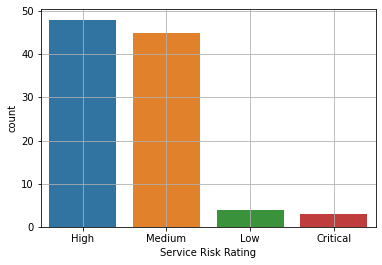

In [167]:
# Distribution of contracts across service risk ratings: Low, Medium, High and Low
sns.countplot(program_data['Service Risk Rating'])
plt.grid()

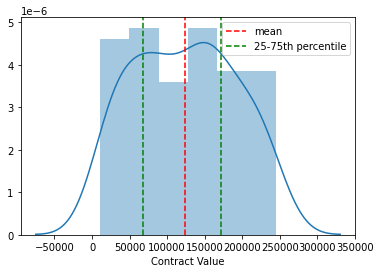

In [20]:
# Distribution of Contract Value
# The average contract value is $123,381
sns.distplot(program_data['Contract Value'])
plt.axvline(x=np.mean(program_data['Contract Value']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(program_data['Contract Value'], 25), c='green', ls='--', label='25-75th percentile')
plt.axvline(x=np.percentile(program_data['Contract Value'], 75), c='green', ls='--')
plt.legend()

In [21]:
# Display all Service Types in the VRM Program file
uniqueServiceType = program_data['Service Type'].unique()
uniqueServiceType

array(['Software Packages', 'Insurance', 'Hardware', 'Mail',
       'Technical Consulting', 'Engineering', 'Stationary',
       'Professional Services', 'Legal', 'Information Technology',
       'Travel', 'Administrative Support', 'Printing', 'Human Resources'],
      dtype=object)

In [22]:
# Determine the concentration of contracts across the service types
software = 0
insurance = 0
hardware = 0
mail = 0
technical_consulting = 0
engineering = 0
stationary = 0
prof_services = 0
legal = 0
info_tech = 0
travel = 0
admin_support = 0
printing = 0
hr = 0

for service_type in program_data['Service Type']:
    if service_type == 'Software Packages':
        software += 1
    elif service_type == 'Insurance':
        insurance += 1
    elif service_type == 'Hardware':
        hardware += 1
    elif service_type == 'Mail':
        mail += 1
    elif service_type == 'Technical Consulting':
        technical_consulting += 1
    elif service_type == 'Engineering':
        engineering += 1
    elif service_type == 'Stationary':
        stationary += 1
    elif service_type == 'Professional Services':
        prof_services += 1
    elif service_type == 'Legal':
        legal += 1
    elif service_type == 'Information Technology':
        info_tech += 1
    elif service_type == 'Travel':
        travel += 1
    elif service_type == 'Administrative Support':
        admin_support += 1
    elif service_type == 'Printing':
        printing += 1
    elif service_type == 'Human Resources':
        hr += 1
total_services = software + insurance + hardware + mail + technical_consulting + engineering + stationary + prof_services + legal + info_tech + travel + admin_support + printing + hr
total_services

100

In [23]:
# Concentration of contracts by service type
service_type_data = [{'Software Packages': software, 
                     'Insurance': insurance, 
                     'Hardware': hardware,
                     'Mail': mail,
                     'Technical Consulting': technical_consulting,
                     'Engineering': engineering, 
                     'Stationary': stationary,
                     'Professional Services': prof_services,
                     'Legal': legal,
                     'Information Technology': info_tech,
                     'Travel': travel,
                     'Administrative Support': admin_support,
                     'Printing': printing,
                     'Human Resources': hr                       
                     }]

service_type_df = pd.DataFrame(service_type_data, index = ['Service Type'])
service_type_df_transpose = service_type_df.transpose()
service_type_df_transpose.sort_values(by=['Service Type'], inplace=True, ascending = False)
service_type_df_transpose

,Service Type
Mail,15
Professional Services,13
Technical Consulting,12
Insurance,11
Administrative Support,11
Software Packages,10
Stationary,8
Engineering,5
Hardware,4
Travel,4


In [24]:
for index,row in service_type_df_transpose.iterrows():
    print(f'{index} {row["Service Type"]}')
    record = {'service_type': index, 'quantity': int(row['Service Type'])}
    #print(record)
    insert_servicetype(record)

Mail 15
60b05fb3ab112fe53be3b9f5
Professional Services 13
60b05fb3ab112fe53be3b9f6
Technical Consulting 12
60b05fb3ab112fe53be3b9f7
Insurance 11
60b05fb3ab112fe53be3b9f8
Administrative Support 11
60b05fb3ab112fe53be3b9f9
Software Packages 10
60b05fb3ab112fe53be3b9fa
Stationary 8
60b05fb3ab112fe53be3b9fb
Engineering 5
60b05fb3ab112fe53be3b9fc
Hardware 4
60b05fb3ab112fe53be3b9fd
Travel 4
60b05fb3ab112fe53be3b9fe
Human Resources 3
60b05fb3ab112fe53be3b9ff
Legal 2
60b05fb3ab112fe53be3ba00
Information Technology 1
60b05fb3ab112fe53be3ba01
Printing 1
60b05fb3ab112fe53be3ba02


In [25]:
import pymongo
from pymongo import MongoClient
from pprint import pprint

client = MongoClient("mongodb://localhost:27017/", connect=True)

db = client['vrm_db']


collection = db['service_type']

new_df = pd.DataFrame(list(collection.find()))
new_df.drop(['_id'], axis=1)
new_df = new_df[['service_type', 'quantity']]
new_df

,service_type,quantity
0,Mail,15.0
1,Professional Services,13.0
2,Technical Consulting,12.0
3,Insurance,11.0
4,Administrative Support,11.0
...,...,...
245,Travel,4.0
246,Human Resources,3.0
247,Legal,2.0
248,Information Technology,1.0


In [26]:
# Create a dictionary that will be passed to the MongoDB database
service_type_db = service_type_df_transpose.to_dict()
insert_servicetype(service_type_db)

60b05fb3ab112fe53be3ba04


<AxesSubplot:title={'center':'Distribution of Contracts by Service Types'}>

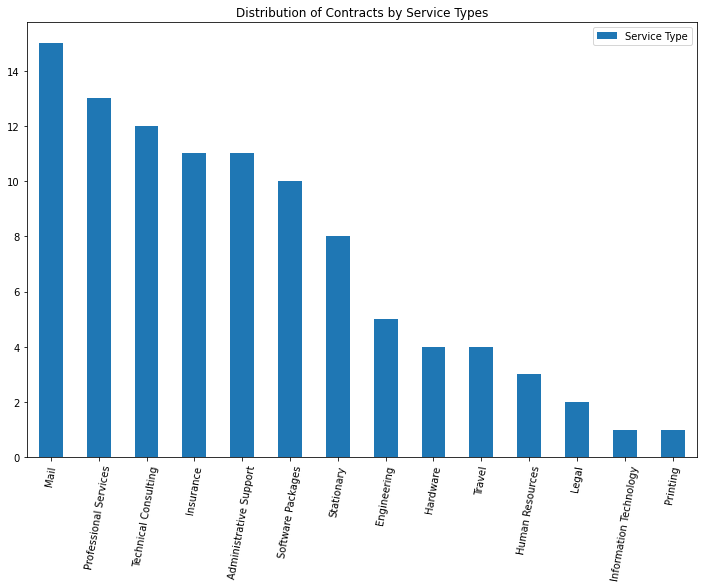

In [27]:
service_type_df_transpose.plot.bar(figsize = (12, 8), rot = 80, title = 'Distribution of Contracts by Service Types')

array([[<AxesSubplot:title={'center':'Service Inception'}>,
        <AxesSubplot:title={'center':'Contract Value'}>,
        <AxesSubplot:title={'center':'Service Risk Score'}>],
       [<AxesSubplot:title={'center':'Reassessment Date'}>,
        <AxesSubplot:title={'center':'Reassessment Completion'}>,
        <AxesSubplot:title={'center':'Open Regulatory Findings'}>],
       [<AxesSubplot:title={'center':'Open Audit Findings'}>,
        <AxesSubplot:title={'center':'Unresolved Assessment Findings'}>,
        <AxesSubplot:>]], dtype=object)

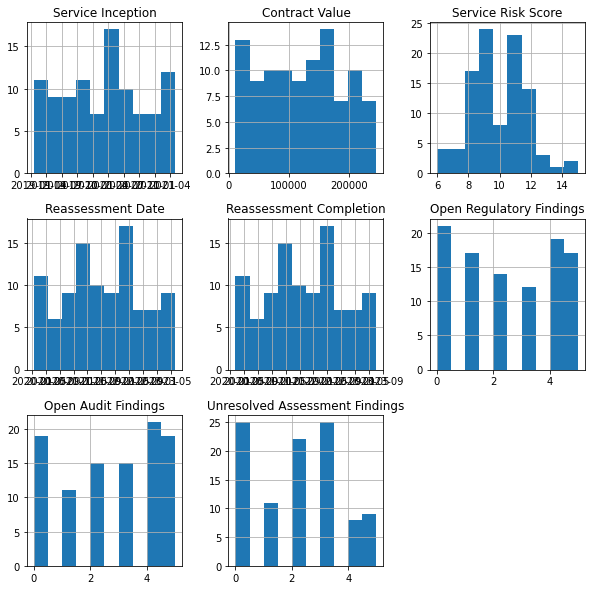

In [28]:
# Visualize all data in the program data file
program_data.hist(figsize = (10, 10))

In [29]:
# Group by regions to display Total Contract Value and Average Service Risk Score
regions_groupby = program_data.groupby(program_data['Region'])

In [30]:
regions_sum = regions_groupby[['Contract Value']].sum()
regions_sum

,Contract Value
Region,
Asia,1682224
Europe,2447712
North America,7514099
South America,694067


In [31]:
# Show the value of contracts across the various regions
# Create a variable to hold the sum of contracts value
contract_value_sum = regions_sum['Contract Value'].sum()
contract_value_sum

12338102

In [32]:
# Create a new column to show the geographic concenration of contracts value
regions_sum['Geographic Concentration'] = regions_sum['Contract Value'] / contract_value_sum

# convert the decimals to fraction
regions_sum['Geographic Concentration'] = regions_sum['Geographic Concentration'] * 100
regions_sum

,Contract Value,Geographic Concentration
Region,,
Asia,1682224,13.634382
Europe,2447712,19.838643
North America,7514099,60.901580
South America,694067,5.625395


In [33]:
# Round the geographic concentration column to 2 decimal places
concentration_pct = regions_sum['Geographic Concentration'].round(2)
concentration_pct

Region
Asia             13.63
Europe           19.84
North America    60.90
South America     5.63
Name: Geographic Concentration, dtype: float64

<AxesSubplot:ylabel='Geographic Concentration'>

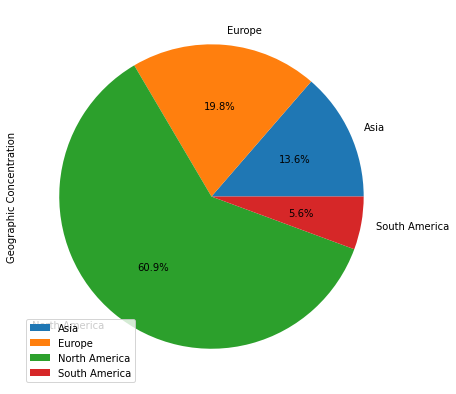

In [34]:
# Create a pie chart to visualize the global distribution of contract value in percentages
regions_sum['Geographic Concentration'].plot.pie(legend = True, autopct = '%.1f%%', figsize = (14, 7))

In [35]:
# Display program data or by country (country specific data) and sort by contract value in ascending order
country_grouping = program_data.groupby(program_data['Country'])

country_data = country_grouping[['Contract Value', 'Open Regulatory Findings',	'Open Audit Findings',	'Unresolved Assessment Findings']].sum()
country_data.sort_values(by=['Contract Value'], ascending=False, inplace=True)
country_data

,Contract Value,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings
Country,,,,
USA,6858629,130,126,109
India,809258,17,10,13
Germany,720126,11,26,15
Canada,655470,6,5,9
Japan,448226,6,9,5
Hungary,440306,4,11,9
England,425139,18,23,12
Poland,387202,3,8,4
Peru,363985,6,3,2


In [36]:
# Contracts with/without KPIs measurement
no_count = 0
yes_count = 0
for kpi in program_data['KPIs Measured']:
    if kpi == 'No':
        no_count += 1
    else:
        yes_count += 1
    total = no_count + yes_count
print(no_count, yes_count, total)

54 46 100


In [37]:
# Put KPIs Measured data in to a dataframe and visualize in a pie chart

kpi_data = [{'No': no_count, 'Yes': yes_count}]

kpi_dataframe = pd.DataFrame(kpi_data, index = ['KPIs Measured?'])
kpi_dataframe

,No,Yes
KPIs Measured?,54,46


In [38]:
kpi_dataframe_transpose = kpi_dataframe.transpose()
kpi_dataframe_transpose

,KPIs Measured?
No,54
Yes,46


<AxesSubplot:title={'center':'Contract Compliance - Contracts With or Without Key Performance Indicators'}>

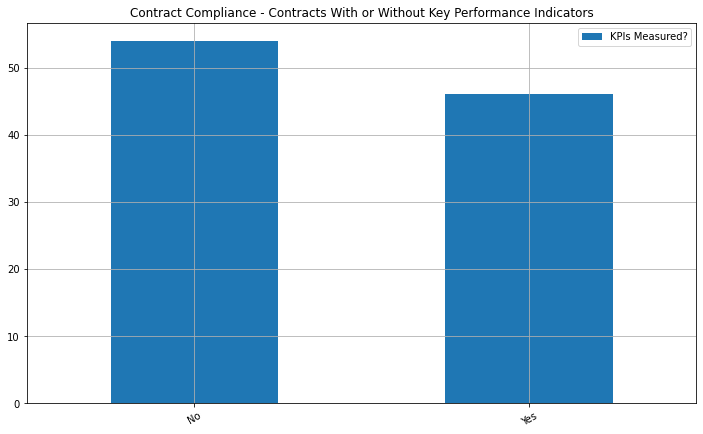

In [154]:
kpi_dataframe_transpose.plot.bar(legend = True, figsize = (12, 7), rot = 30, title = 'Contract Compliance - Contracts With or Without Key Performance Indicators', grid = True)

In [40]:
# Measurement of KPI compliance; for contracts having KPIs this shows the level of compliance risk
low = 0
medium = 0
high = 0
critical = 0
for compliance_kpi in program_data['Contract Compliance Risk']:
    if compliance_kpi == 'Low':
        low += 1
    elif compliance_kpi == 'Medium':
        medium += 1
    elif compliance_kpi == 'High':
        high += 1
    else:
        critical += 1
    compliance_total = low + medium + high + critical
print(low, medium, high, critical, compliance_total)

19 9 9 63 100


In [41]:
# Put KPIs Compliance data in to a dataframe and visualize bar chart

compliance_data = [{'Low Risk': low, 'Medium Risk': medium, 'High Risk': high, 'Critical Risk': critical}]

compliance_dataframe = pd.DataFrame(compliance_data, index = ['KPI Compliance'])
compliance_dataframe_transpose = compliance_dataframe.transpose()
compliance_dataframe_transpose

,KPI Compliance
Low Risk,19
Medium Risk,9
High Risk,9
Critical Risk,63


<AxesSubplot:title={'center':'Compliance to Key Performance Indicators'}>

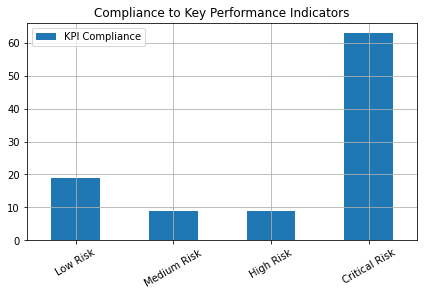

In [168]:
compliance_dataframe_transpose.plot.bar(legend = True, figsize = (7, 4), rot = 30, title = 'Compliance to Key Performance Indicators', grid = True, stacked = True)

<AxesSubplot:>

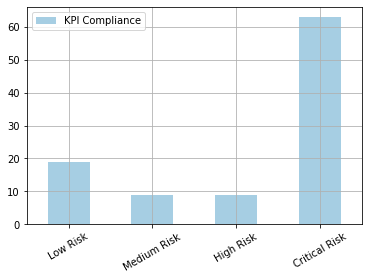

In [43]:
my_colors = ['g', 'b']*5
compliance_dataframe_transpose.plot(kind = 'bar', stacked = True, rot = 30, colormap = 'Paired', grid = True)

<AxesSubplot:ylabel='KPI Compliance'>

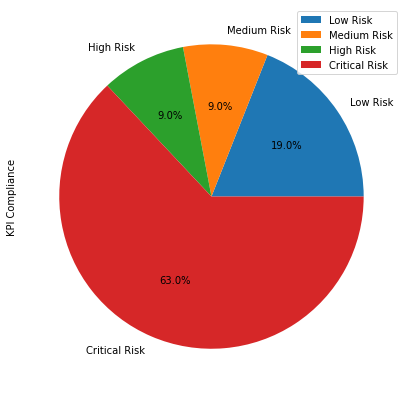

In [44]:
# Create a pie chart to visualize the KPI Compliance for all contracts in the VRM program as Low, Medium, High, and Critical
compliance_dataframe_transpose['KPI Compliance'].plot.pie(legend = True, autopct = '%.1f%%', figsize = (14, 7))

In [45]:
# Statistical data using country data
country_data.describe()

,Contract Value,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings
count,1.500000e+01,15.000000,15.000000,15.000000
mean,8.225401e+05,16.133333,17.666667,13.800000
std,1.682579e+06,31.881178,30.651653,26.630273
min,1.119190e+05,1.000000,3.000000,2.000000
25%,2.248420e+05,5.500000,6.000000,4.000000
50%,3.872020e+05,6.000000,9.000000,7.000000
75%,5.518480e+05,12.000000,10.500000,10.500000
max,6.858629e+06,130.000000,126.000000,109.000000


<AxesSubplot:ylabel='Contract Value'>

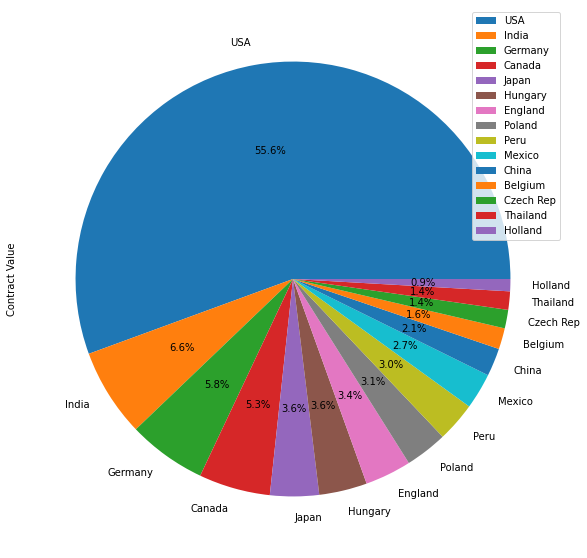

In [46]:
# Create a pie chart to visualize the global distribution of contract value in percentages
country_data['Contract Value'].plot.pie(legend = True, autopct = '%.1f%%', figsize = (20, 10))

In [47]:
# Open Regulatory, Audit and Assessment Findings by Region
regions_findings = regions_groupby[['Open Regulatory Findings', 'Open Audit Findings', 'Unresolved Assessment Findings']].sum()
regions_findings

,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings
Region,,,
Asia,34,31,30
Europe,56,90,50
North America,136,131,118
South America,16,13,9


<AxesSubplot:title={'center':'Number of Open Regulatory, Audit and Contract Reassessment Issues'}, xlabel='Region'>

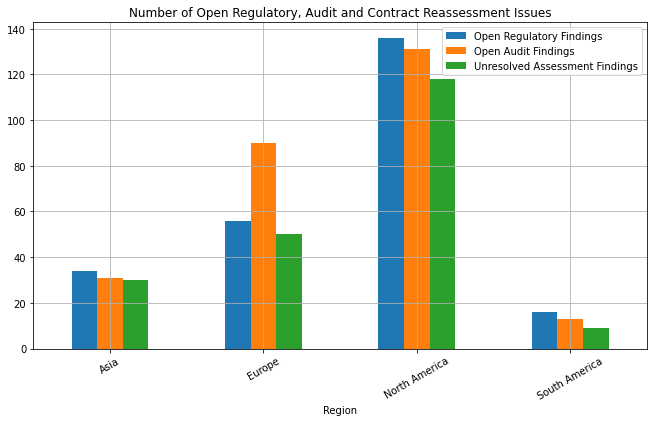

In [48]:
# Visualization of open regulatory, audit and assessment findings across all regions
regions_findings.plot.bar(figsize = (11, 6), grid = True, rot = 30, title = 'Number of Open Regulatory, Audit and Contract Reassessment Issues')

In [49]:
contracts_number = len(program_data['Contract ID'])
contracts_number

100

In [50]:
# Count number of vendors; group by vendors
vendors_groupby = program_data.set_index(program_data['Vendor'])
vendors_groupby

,Vendor,Service Type,Contract ID,Service Inception,Region,Country,Contract Value,Service Risk Score,Service Risk Rating,Alternate Vendor,Reassessment Date,Reassessment Completion,Reassessment Status,Days Until Reassessment Completion,KPIs Measured,Contract Compliance Risk,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings
Vendor,,,,,,,,,,,,,,,,,,,
Vend-87,Vend-87,Software Packages,Con-101,2019-11-01,North America,USA,32139,12.0,High,No,2020-10-31,2020-11-30,Complete,Complete,No,Unknown - KPIs Not Measured,4,3,1
Vend-61,Vend-61,Insurance,Con-102,2019-05-13,Europe,Germany,90695,10.5,High,No,2020-05-12,2020-06-11,Complete,Complete,No,Unknown - KPIs Not Measured,2,3,2
Vend-98,Vend-98,Hardware,Con-103,2019-04-05,South America,Mexico,108545,8.0,Medium,Not Required,2021-04-04,2021-05-04,Past Due 15 - 30 Days,-19,No,Unknown - KPIs Not Measured,5,4,0
Vend-54,Vend-54,Mail,Con-104,2020-07-08,Asia,India,23560,8.0,Medium,Not Required,2022-07-08,2022-08-07,Not Due > 30 Days,441,Yes,High,4,5,4
Vend-70,Vend-70,Technical Consulting,Con-105,2019-03-13,North America,USA,10898,9.0,Medium,Not Required,2021-03-12,2021-04-11,Complete,Complete,Yes,Low,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vend-89,Vend-89,Administrative Support,Con-196,2021-01-20,North America,USA,241033,12.0,High,Yes,2022-01-20,2022-02-19,Not Due > 30 Days,272,No,Unknown - KPIs Not Measured,4,2,3
Vend-79,Vend-79,Mail,Con-197,2020-11-08,Europe,England,150585,9.5,Medium,Not Required,2022-11-08,2022-12-08,Not Due > 30 Days,564,Yes,High,3,2,5
Vend-75,Vend-75,Insurance,Con-198,2020-04-16,Europe,Germany,45322,11.0,High,Yes,2021-04-16,2021-05-16,Past Due 0 - 15 Days,-7,Yes,Medium,2,4,3


In [51]:
# The risk rating of a contract determines the frequency of reassessment; below is an aggregation and visualization of reassessment status across all contracts in the VRM Program
complete = 0
past_due_under_15 = 0
past_due_15_30 = 0
past_due_30_plus = 0
in_prog_due_under_15 = 0
in_prog_due_15_30 = 0
not_due_over_30 = 0

for reassessment_status in program_data['Reassessment Status']:
    if reassessment_status == 'Complete':
        complete += 1
    elif reassessment_status == 'Past Due 0 - 15 Days':
        past_due_under_15 += 1
    elif reassessment_status == 'Past Due 15 - 30 Days':
        past_due_15_30 += 1
    elif reassessment_status == 'Past Due > 30 Days':
        past_due_30_plus += 1
    elif reassessment_status == 'In Progress - Due in < 15 Days':
        in_prog_due_under_15 += 1
    elif reassessment_status == 'In Progress - Due 15 - 30 Days':
        in_prog_due_15_30 += 1
    else:
        not_due_over_30 += 1
total_reassessment = complete + past_due_under_15 + past_due_15_30 + past_due_30_plus + in_prog_due_under_15 + in_prog_due_15_30 + not_due_over_30
print('Complete: ', complete)
print('Past Due in under 15 Days: ', past_due_under_15)
print('Past Due 15 to 30 Days: ', past_due_15_30)
print('Past Due over 30 Days: ', past_due_30_plus)
print('In Progress - Due in 15 Days or Less: ', in_prog_due_under_15)
print('In Progress - Due 15 - 30 Days: ', in_prog_due_15_30)
print('Not Due over 30 Days: ', not_due_over_30)
print('Total Contracts: ', total_reassessment)

Complete:  30
Past Due in under 15 Days:  3
Past Due 15 to 30 Days:  1
Past Due over 30 Days:  4
In Progress - Due in 15 Days or Less:  2
In Progress - Due 15 - 30 Days:  0
Not Due over 30 Days:  60
Total Contracts:  100


In [52]:
# Put the sum of reassessment status into a dataframe file structure

reassessment_data = [{'Complete': complete, 
                     'Past Due in under 15 Days': past_due_under_15, 
                     'Past Due 15 to 30 Days': past_due_15_30,
                     'Past Due over 30 Days': past_due_30_plus,
                     'In Progress - Due in 15 Days or Less': in_prog_due_under_15,
                     'In Progress - Due 15 - 30 Days': in_prog_due_15_30, 
                     'Not Due over 30 Days': not_due_over_30
                     }]

reassessment_dataframe = pd.DataFrame(reassessment_data, index = ['Reassessment Status'])
reassessment_dataframe_transpose = reassessment_dataframe.transpose()
reassessment_dataframe_transpose

,Reassessment Status
Complete,30
Past Due in under 15 Days,3
Past Due 15 to 30 Days,1
Past Due over 30 Days,4
In Progress - Due in 15 Days or Less,2
In Progress - Due 15 - 30 Days,0
Not Due over 30 Days,60


<AxesSubplot:title={'center':'Status of Contracts Reassessment'}>

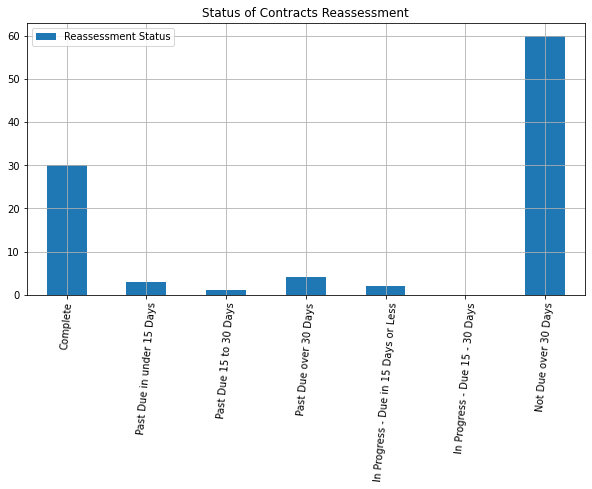

In [53]:
# Bar Chart of reassessment status
reassessment_dataframe_transpose.plot.bar(legend = True, grid = True, figsize = (10, 5), rot = 85, title = 'Status of Contracts Reassessment')

In [54]:
# Progress of reassessment along risk domains
risk_assmt_data.head(11)

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Total Responses,Completion %,Reassessment Status
0,Vend-98,Hardware,Con-103,0,3,10,3,17,27,26,4,90,0.391304,Past Due 0 - 15 Days
1,Vend-76,Stationary,Con-107,0,0,9,5,26,40,16,5,101,0.439130,In Progress - Due in < 15 Days
2,Vend-50,Software Packages,Con-123,3,6,2,1,53,45,23,7,140,0.608696,Past Due > 30 Days
3,Vend-91,Administrative Support,Con-131,1,6,7,1,22,14,27,6,84,0.365217,In Progress - Due 15 - 30 Days
4,Vend-64,Stationary,Con-138,0,8,8,7,55,15,5,2,100,0.434783,Past Due > 30 Days
5,Vend-56,Mail,Con-145,1,2,2,5,32,29,16,0,87,0.378261,Past Due > 30 Days
6,Vend-79,Technical Consulting,Con-158,6,10,8,7,11,30,11,4,87,0.378261,In Progress - Due 15 - 30 Days
7,Vend-52,Mail,Con-173,3,5,3,1,34,43,9,4,102,0.443478,In Progress - Due in < 15 Days
8,Vend-86,Software Packages,Con-182,5,1,5,4,47,37,13,10,122,0.530435,Past Due 15 - 30 Days
9,Vend-75,Insurance,Con-198,5,11,7,7,57,27,34,10,158,0.686957,In Progress - Due in < 15 Days


In [55]:
# Average of number of questions answered expressed as a percentage of total numbers in the questionnaire
average = risk_assmt_data.head(10)
strategic = average['Strategic Risk'].mean()
strategic
legal_regulatory = average['Legal and Regulatory Compliance'].mean()
legal_regulatory
financial = average['Financial Risk'].mean()
financial
reputational = average['Reputational'].mean()
reputational
info_sec = average['Information Security'].mean()
info_sec
info_tech = average['Information Technology'].mean()
info_tech
physical_sec = average['Physical Security'].mean()
physical_sec
insurance = average['Insurance Coverage'].mean()
insurance

# print average questions respnded to by vendors in each risk tomain
print('Strategic Risk Average: ', strategic)
print('Legal and Regulatory Compliance: ', legal_regulatory)
print('Financial Risk: ', financial)
print('Reputational: ', reputational)
print('Information Security: ', info_sec)
print('Information Technology: ', info_tech)
print('Physical Security: ', physical_sec)
print('Insurance Coverage: ', insurance)

Strategic Risk Average:  2.4
Legal and Regulatory Compliance:  5.2
Financial Risk:  6.1
Reputational:  4.1
Information Security:  35.4
Information Technology:  30.7
Physical Security:  18.0
Insurance Coverage:  5.2


In [56]:
# Assign variables to the total number of questions across each of the risk assessment domains; basically collecting the information in the last row of the file
strategic_domain = risk_assmt_data.iloc[-1][3]
strategic_domain
legal_reg_domain = risk_assmt_data.iloc[-1][4]
legal_reg_domain
financial_domain = risk_assmt_data.iloc[-1][5]
financial_domain
reputational_domain = risk_assmt_data.iloc[-1][6]
reputational_domain
infosec_domain = risk_assmt_data.iloc[-1][7]
infosec_domain
it_domain = risk_assmt_data.iloc[-1][8]
it_domain
physec_domain = risk_assmt_data.iloc[-1][9]
physec_domain
ins_domain = risk_assmt_data.iloc[-1][10]
ins_domain
total_questions = strategic_domain + legal_reg_domain + financial_domain + reputational_domain + infosec_domain + it_domain + physec_domain + ins_domain

# print total questions in each risk tomain
print('Strategic Risk Domain: ', strategic_domain)
print('Legal and Regulatory Compliance Domain: ', legal_reg_domain)
print('Financial Risk Domain: ', financial_domain)
print('Reputational Risk Domain: ', reputational_domain)
print('Information Security Domain: ', infosec_domain)
print('Information Technology Domain: ', it_domain)
print('Physical Security Domain: ', physec_domain)
print('Insurance Coverage Domain: ', ins_domain)
print('Total Vendor Risk Assessment Question: ', total_questions)

Strategic Risk Domain:  10
Legal and Regulatory Compliance Domain:  20
Financial Risk Domain:  15
Reputational Risk Domain:  10
Information Security Domain:  75
Information Technology Domain:  50
Physical Security Domain:  40
Insurance Coverage Domain:  10
Total Vendor Risk Assessment Question:  230


In [57]:
# Create a dataframe to hold the risk domains, average and total risk domains questions
domain_data = {'Risk Domain': ['Strategic', 'Legal and Regulatory Compliance', 'Financial', 'Reputational', 'Information Security', 'Information Technology', 'Physical Security', 'Insurance Coverage'],
              'Average Domain Responses': [strategic, legal_regulatory, financial, reputational, info_sec, info_tech, physical_sec, insurance],
              'Total Domain Responses': [strategic_domain, legal_reg_domain, financial_domain, reputational_domain, infosec_domain, it_domain, physec_domain, ins_domain]
              }

domain_data_df = pd.DataFrame(domain_data)
domain_data_df.set_index(['Risk Domain'], inplace=True)
domain_data_df

,Average Domain Responses,Total Domain Responses
Risk Domain,,
Strategic,2.4,10
Legal and Regulatory Compliance,5.2,20
Financial,6.1,15
Reputational,4.1,10
Information Security,35.4,75
Information Technology,30.7,50
Physical Security,18.0,40
Insurance Coverage,5.2,10


<AxesSubplot:title={'center':'Current State of Assessments vs Target per Risk Domain'}, xlabel='Risk Domain'>

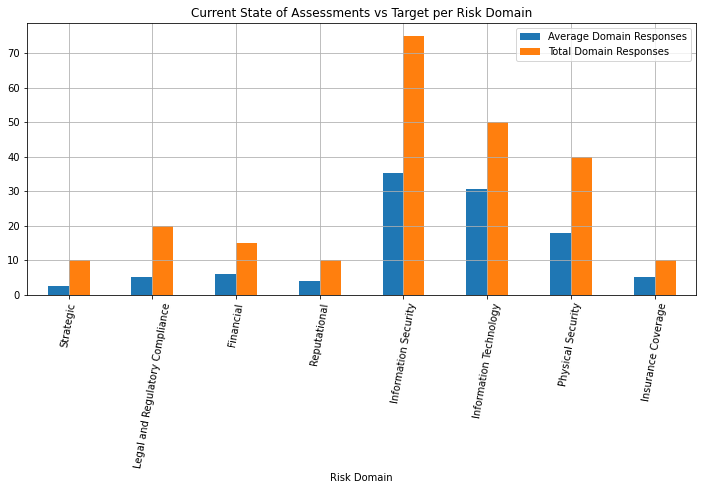

In [58]:
domain_data_df.plot(kind='bar', legend = True, figsize=(12, 5), rot = 80, grid=True, title='Current State of Assessments vs Target per Risk Domain', fontsize=10)

## How Do We Determine Vendor Risk?

#### ** Using a normalization scale (% of total risk given x amount of contracts) **
#### Vendor risk when considering parent/subsidiary relationship

In [59]:
vendor_grouping = program_data.groupby(program_data['Vendor'])
vendor_sum = vendor_grouping[['Contract Value', 'Service Risk Score']].sum()
vendor_sum.head()

,Contract Value,Service Risk Score
Vendor,,
Vend-50,318426,20.0
Vend-51,661037,24.5
Vend-52,197514,9.5
Vend-53,67806,11.0
Vend-54,117342,29.5


In [60]:
risk_multiplier = vendor_grouping[['Contract ID']].count()
risk_multiplier.head()

,Contract ID
Vendor,
Vend-50,2
Vend-51,3
Vend-52,1
Vend-53,1
Vend-54,3


In [61]:
vendor_grouping_concatenate = pd.concat([risk_multiplier, vendor_sum], axis=1, join='inner')
vendor_grouping_concatenate.head()

,Contract ID,Contract Value,Service Risk Score
Vendor,,,
Vend-50,2,318426,20.0
Vend-51,3,661037,24.5
Vend-52,1,197514,9.5
Vend-53,1,67806,11.0
Vend-54,3,117342,29.5


In [62]:
vendor_grouping_concatenate.columns = ['No of Contracts', 'Total Contract Value', 'Aggregated Contracts Score']
vendor_grouping_concatenate.head()

,No of Contracts,Total Contract Value,Aggregated Contracts Score
Vendor,,,
Vend-50,2,318426,20.0
Vend-51,3,661037,24.5
Vend-52,1,197514,9.5
Vend-53,1,67806,11.0
Vend-54,3,117342,29.5


In [63]:
worst = 16
denominator  = vendor_grouping_concatenate['No of Contracts'] * worst
vendor_grouping_concatenate['Vendor Risk Score'] = vendor_grouping_concatenate['Aggregated Contracts Score'] / denominator
vendor_grouping_concatenate.head()

,No of Contracts,Total Contract Value,Aggregated Contracts Score,Vendor Risk Score
Vendor,,,,
Vend-50,2,318426,20.0,0.625000
Vend-51,3,661037,24.5,0.510417
Vend-52,1,197514,9.5,0.593750
Vend-53,1,67806,11.0,0.687500
Vend-54,3,117342,29.5,0.614583


In [64]:
vendor_grouping_concatenate['Vendor Risk Score'].dtypes

dtype('float64')

In [65]:
vendor_df = vendor_grouping_concatenate.reset_index()
vendor_df.head()

,Vendor,No of Contracts,Total Contract Value,Aggregated Contracts Score,Vendor Risk Score
0,Vend-50,2,318426,20.0,0.625000
1,Vend-51,3,661037,24.5,0.510417
2,Vend-52,1,197514,9.5,0.593750
3,Vend-53,1,67806,11.0,0.687500
4,Vend-54,3,117342,29.5,0.614583


In [66]:
vendor_df['No of Contracts'].sum()

100

In [67]:
for vendor_score in vendor_df['Vendor Risk Score']:
    if vendor_score < 0.4375:
        vendor_df['Vendor Risk Rating'] = 'Low Risk'
    elif vendor_score > 0.6:
        vendor_df['Vendor Risk Rating'] = 'High'

In [68]:
score_list = []
for vendor_score in vendor_df['Vendor Risk Score']:
    if vendor_score < 0.4375:
        score_list.append('Low Risk')
    elif vendor_score >= 0.4375 and vendor_score < 0.625:
        score_list.append('Medium Risk')
    elif vendor_score >= 0.625 and vendor_score < 0.875:
        score_list.append('High Risk')
    else:
        score_list.append('Critical Risk')
print(score_list)

['High Risk', 'Medium Risk', 'Medium Risk', 'High Risk', 'Medium Risk', 'High Risk', 'High Risk', 'High Risk', 'High Risk', 'Medium Risk', 'High Risk', 'High Risk', 'Medium Risk', 'High Risk', 'Medium Risk', 'High Risk', 'Medium Risk', 'High Risk', 'Medium Risk', 'High Risk', 'High Risk', 'Medium Risk', 'Medium Risk', 'Medium Risk', 'Medium Risk', 'Medium Risk', 'Medium Risk', 'High Risk', 'Medium Risk', 'Low Risk', 'Medium Risk', 'High Risk', 'High Risk', 'High Risk', 'Medium Risk', 'High Risk', 'Medium Risk', 'Medium Risk', 'High Risk', 'Critical Risk', 'Medium Risk', 'High Risk']


In [69]:
vendor_df['Vendor Risk Rating'] = score_list
vendor_df.head(10)

,Vendor,No of Contracts,Total Contract Value,Aggregated Contracts Score,Vendor Risk Score,Vendor Risk Rating
0,Vend-50,2,318426,20.0,0.625000,High Risk
1,Vend-51,3,661037,24.5,0.510417,Medium Risk
2,Vend-52,1,197514,9.5,0.593750,Medium Risk
3,Vend-53,1,67806,11.0,0.687500,High Risk
4,Vend-54,3,117342,29.5,0.614583,Medium Risk
5,Vend-56,4,575753,41.5,0.648438,High Risk
6,Vend-57,2,168885,20.0,0.625000,High Risk
7,Vend-58,2,295233,25.5,0.796875,High Risk
8,Vend-61,6,534871,60.0,0.625000,High Risk
9,Vend-62,1,143927,9.0,0.562500,Medium Risk


In [70]:
vendor_risk_df = vendor_df.set_index(['Vendor'])
vendor_risk_df.head()

,No of Contracts,Total Contract Value,Aggregated Contracts Score,Vendor Risk Score,Vendor Risk Rating
Vendor,,,,,
Vend-50,2,318426,20.0,0.625000,High Risk
Vend-51,3,661037,24.5,0.510417,Medium Risk
Vend-52,1,197514,9.5,0.593750,Medium Risk
Vend-53,1,67806,11.0,0.687500,High Risk
Vend-54,3,117342,29.5,0.614583,Medium Risk


In [71]:
program_data.head()

,Vendor,Service Type,Contract ID,Service Inception,Region,Country,Contract Value,Service Risk Score,Service Risk Rating,Alternate Vendor,Reassessment Date,Reassessment Completion,Reassessment Status,Days Until Reassessment Completion,KPIs Measured,Contract Compliance Risk,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings
0,Vend-87,Software Packages,Con-101,2019-11-01,North America,USA,32139,12.0,High,No,2020-10-31,2020-11-30,Complete,Complete,No,Unknown - KPIs Not Measured,4,3,1
1,Vend-61,Insurance,Con-102,2019-05-13,Europe,Germany,90695,10.5,High,No,2020-05-12,2020-06-11,Complete,Complete,No,Unknown - KPIs Not Measured,2,3,2
2,Vend-98,Hardware,Con-103,2019-04-05,South America,Mexico,108545,8.0,Medium,Not Required,2021-04-04,2021-05-04,Past Due 15 - 30 Days,-19,No,Unknown - KPIs Not Measured,5,4,0
3,Vend-54,Mail,Con-104,2020-07-08,Asia,India,23560,8.0,Medium,Not Required,2022-07-08,2022-08-07,Not Due > 30 Days,441,Yes,High,4,5,4
4,Vend-70,Technical Consulting,Con-105,2019-03-13,North America,USA,10898,9.0,Medium,Not Required,2021-03-12,2021-04-11,Complete,Complete,Yes,Low,4,1,3


In [72]:
program_data.describe()

,Contract Value,Service Risk Score,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings
count,100.000000,100.00000,100.000000,100.000000,100.000000
mean,123381.020000,9.92000,2.420000,2.650000,2.070000
std,67822.374588,1.70815,1.810073,1.783057,1.584362
min,10898.000000,6.00000,0.000000,0.000000,0.000000
25%,67566.000000,8.87500,1.000000,1.000000,0.750000
50%,126764.500000,10.00000,2.000000,3.000000,2.000000
75%,171904.750000,11.00000,4.000000,4.000000,3.000000
max,244779.000000,15.00000,5.000000,5.000000,5.000000


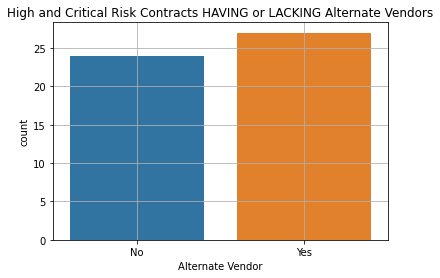

In [169]:
# Alternate Vendor
alternate_vendor = program_data.loc[(program_data['Service Risk Rating'] == 'Critical') | (program_data['Service Risk Rating'] == 'High')]
sns.countplot(alternate_vendor['Alternate Vendor'])
#sns.countplot(alternate_vendor['Alternate Vendor']).set_title('High and Critical Risk Contracts HAVING or LACKING Alternate Vendors')
plt.title('High and Critical Risk Contracts HAVING or LACKING Alternate Vendors')
plt.grid()

In [74]:
# Writing Contract Risk Scores to MongoDB
for i in range(len(risk_scoring)):
    row = risk_scoring.iloc[[i]]
    #print(row)
for index, row in risk_scoring.iterrows():
    scoring_output = index, row[[]]
    data = index, row[['Vendor', 'Service Type', 'Contract ID', 'Service Risk Score', 'Service Risk Rating']]
    data_dict = {'Vendor': row['Vendor'], 'Service Type': row['Service Type'], 'Contract ID': row['Contract ID'], 'Service Risk Score': row['Service Risk Score'], 'Service Risk Rating': row['Service Risk Rating']}
    #insert_contractscoring(data_dict)

In [75]:
# Writing Vendor Risk Scores to MongoDB
for index, row in vendor_df.iterrows():
    #vendor_score_output = index, row[[]]
    #vendor_data = index, row[['Vendor', 'Service Type', 'Contract ID', 'Service Risk Score', 'Service Risk Rating']]
    vendor_data_dict = {'Vendor': row['Vendor'], 'No of Contracts': row['No of Contracts'], 'Total Contract Value': row['Total Contract Value'], 'Aggregated Contracts Score': row['Aggregated Contracts Score'], 'Vendor Risk Score': row['Vendor Risk Score'], 'Vendor Risk Rating': row['Vendor Risk Rating']}
    insert_vendorscoring(vendor_data_dict)
    #print(vendor_data_dict)

60b05fbdab112fe53be3ba05
60b05fbdab112fe53be3ba06
60b05fbdab112fe53be3ba07
60b05fbdab112fe53be3ba08
60b05fbdab112fe53be3ba09
60b05fbdab112fe53be3ba0a
60b05fbdab112fe53be3ba0b
60b05fbdab112fe53be3ba0c
60b05fbdab112fe53be3ba0d
60b05fbdab112fe53be3ba0e
60b05fbdab112fe53be3ba0f
60b05fbdab112fe53be3ba10
60b05fbdab112fe53be3ba11
60b05fbdab112fe53be3ba12
60b05fbdab112fe53be3ba13
60b05fbdab112fe53be3ba14
60b05fbdab112fe53be3ba15
60b05fbdab112fe53be3ba16
60b05fbdab112fe53be3ba17
60b05fbdab112fe53be3ba18
60b05fbdab112fe53be3ba19
60b05fbdab112fe53be3ba1a
60b05fbdab112fe53be3ba1b
60b05fbdab112fe53be3ba1c
60b05fbdab112fe53be3ba1d
60b05fbdab112fe53be3ba1e
60b05fbdab112fe53be3ba1f
60b05fbdab112fe53be3ba20
60b05fbdab112fe53be3ba21
60b05fbdab112fe53be3ba22
60b05fbdab112fe53be3ba23
60b05fbdab112fe53be3ba24
60b05fbdab112fe53be3ba25
60b05fbdab112fe53be3ba26
60b05fbdab112fe53be3ba27
60b05fbdab112fe53be3ba28
60b05fbdab112fe53be3ba29
60b05fbdab112fe53be3ba2a
60b05fbdab112fe53be3ba2b
60b05fbdab112fe53be3ba2c


#### Predictive Modeling: Enhanced Oversight based on Service Risk Score and its drivers

##### Senior Management would like to invest more into the oversight of High and Critical Risk contracts. They would like to understand whether the model is accurately classifying contracts. Because they would like to increate oversight of high and critical risk vendor, we create two classes: Ehhanced Oversight = Yes (for high and critical) and Ehnanced Oversight = No (for Medium and Low risk). The X input variables are the risk domain scores (strategic, fiancial, regulatory, etc) and y variable as binary for Ehnenced Oversight (Yes/No, or 1/0)

In [76]:
enhanced_oversight = risk_scoring.iloc[:, 0:13]
enhanced_oversight.head()

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Service Risk Score,Service Risk Rating
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,3,12.0,High
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,3,10.5,High
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,4,8.0,Medium
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,3,8.0,Medium
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,1,9.0,Medium


In [77]:
enhanced_oversight_2 = program_data.iloc[:, 16:19]
enhanced_oversight_2.head()

,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings
0,4,3,1
1,2,3,2
2,5,4,0
3,4,5,4
4,4,1,3


In [78]:
# Tagging of Contracts as Yes (for EO) or No (for no EO)
eo_list = []
for qualifier in enhanced_oversight['Service Risk Rating']:
    if qualifier == 'Critical' or qualifier == 'High':
        eo_list.append('Yes')
    else:
        eo_list.append('No')
print(eo_list)

['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes']


In [79]:
enhanced_oversight['Enhanced Oversight'] = eo_list
enhanced_oversight

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Service Risk Score,Service Risk Rating,Enhanced Oversight
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,3,12.0,High,Yes
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,3,10.5,High,Yes
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,4,8.0,Medium,No
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,3,8.0,Medium,No
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,1,9.0,Medium,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vend-89,Administrative Support,Con-196,2,1,2,3,4,4,4,4,12.0,High,Yes
96,Vend-79,Mail,Con-197,2,4,1,1,4,3,2,2,9.5,Medium,No
97,Vend-75,Insurance,Con-198,4,2,3,4,2,3,2,2,11.0,High,Yes
98,Vend-84,Administrative Support,Con-199,3,2,4,1,2,3,1,2,9.0,Medium,No


In [80]:
enhanced_oversight_combo = enhanced_oversight.join(enhanced_oversight_2)
enhanced_oversight_combo.head()

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Service Risk Score,Service Risk Rating,Enhanced Oversight,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,3,12.0,High,Yes,4,3,1
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,3,10.5,High,Yes,2,3,2
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,4,8.0,Medium,No,5,4,0
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,3,8.0,Medium,No,4,5,4
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,1,9.0,Medium,No,4,1,3


In [81]:
# Writing Enhanced Oversight Yes/No qualifier to MongoDB
for index, row in enhanced_oversight.iterrows():
    enhanced_oversight_dict = {'Vendor': row['Vendor'], 'Service Type': row['Service Type'], 'Contract ID': row['Contract ID'], 'Service Risk Score': row['Service Risk Score'], 'Service Risk Rating': row['Service Risk Rating'], 'Enhanced Oversight': row['Enhanced Oversight']}
    insert_enhancedoversight(enhanced_oversight_dict)
    #print(enhanced_oversight_dict)

In [82]:
program_data.columns

Index(['Vendor', 'Service Type', 'Contract ID', 'Service Inception', 'Region',
       'Country', 'Contract Value', 'Service Risk Score',
       'Service Risk Rating', 'Alternate Vendor', 'Reassessment Date',
       'Reassessment Completion', 'Reassessment Status',
       'Days Until Reassessment Completion', 'KPIs Measured',
       'Contract Compliance Risk', 'Open Regulatory Findings',
       'Open Audit Findings', 'Unresolved Assessment Findings'],
      dtype='object')

In [83]:
enhanced_ml = program_data[['Vendor', 'Service Type', 'Contract ID', 'Country', 'Contract Value', 'Service Risk Score', 'Service Risk Rating', 'Open Regulatory Findings',
       'Open Audit Findings', 'Unresolved Assessment Findings']]
enhanced_ml.tail()

,Vendor,Service Type,Contract ID,Country,Contract Value,Service Risk Score,Service Risk Rating,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings
95,Vend-89,Administrative Support,Con-196,USA,241033,12.0,High,4,2,3
96,Vend-79,Mail,Con-197,England,150585,9.5,Medium,3,2,5
97,Vend-75,Insurance,Con-198,Germany,45322,11.0,High,2,4,3
98,Vend-84,Administrative Support,Con-199,USA,78983,9.0,Medium,4,5,4
99,Vend-64,Engineering,Con-200,Canada,195410,11.0,High,4,1,3


In [84]:
enhanced_oversight.head()

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Service Risk Score,Service Risk Rating,Enhanced Oversight
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,3,12.0,High,Yes
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,3,10.5,High,Yes
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,4,8.0,Medium,No
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,3,8.0,Medium,No
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,1,9.0,Medium,No


### Applying Maching Learning to the High and Critical Vendors

In [85]:
# Import the necessary packages
import numpy as np # for mathematical functions
import pandas as pd # tabular format for data, rows and columns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from pathlib import Path

# Need for decision tree visualization
import pydotplus
from IPython.display import Image

In [86]:
# Segment the features from the target
y = enhanced_oversight["Enhanced Oversight"]
X = enhanced_oversight[['Strategic Risk', 'Legal and Regulatory Compliance', 'Financial Risk', 'Reputational', 'Information Security', 'Information Technology', 'Physical Security', 'Insurance Coverage']]

In [87]:
y.head()

0    Yes
1    Yes
2     No
3     No
4     No
Name: Enhanced Oversight, dtype: object

In [88]:
X.head()

,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage
0,4,3,2,2,4,2,4,3
1,2,4,2,2,4,3,1,3
2,1,1,2,2,3,2,1,4
3,1,3,2,2,1,1,3,3
4,1,4,1,2,3,3,3,1


In [89]:
X.shape

(100, 8)

In [170]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

# Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
35,Yes,Yes
26,Yes,No
86,Yes,Yes
38,No,Yes
99,Yes,Yes
12,No,No
46,Yes,Yes
31,Yes,Yes
90,No,Yes
17,No,No


In [91]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.72
Testing Data Score: 0.76


In [92]:
# double check accuracy score
print("Accuracy Score", accuracy_score(y_test, predictions)*100)

Accuracy Score 76.0


In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[11,  1],
       [ 5,  8]], dtype=int64)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.69      0.92      0.79        12
         Yes       0.89      0.62      0.73        13

    accuracy                           0.76        25
   macro avg       0.79      0.77      0.76        25
weighted avg       0.79      0.76      0.76        25



### Optimize the model by adding more input variables

##### Create one dataframe that contains all of the input variables, including the objective (output) variable

In [95]:
# Concatenate risk scoring and program data

In [96]:
risk_scoring.columns

Index(['Vendor', 'Service Type', 'Contract ID', 'Strategic Risk',
       'Legal and Regulatory Compliance', 'Financial Risk', 'Reputational',
       'Information Security', 'Information Technology', 'Physical Security',
       'Insurance Coverage', 'Service Risk Score', 'Service Risk Rating',
       'Normalized Score', 'Reassessment Status'],
      dtype='object')

In [97]:
program_data.columns

Index(['Vendor', 'Service Type', 'Contract ID', 'Service Inception', 'Region',
       'Country', 'Contract Value', 'Service Risk Score',
       'Service Risk Rating', 'Alternate Vendor', 'Reassessment Date',
       'Reassessment Completion', 'Reassessment Status',
       'Days Until Reassessment Completion', 'KPIs Measured',
       'Contract Compliance Risk', 'Open Regulatory Findings',
       'Open Audit Findings', 'Unresolved Assessment Findings'],
      dtype='object')

In [98]:
risk_scoring_df = risk_scoring.drop(columns = 'Normalized Score')
risk_scoring_df.head()

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Service Risk Score,Service Risk Rating,Reassessment Status
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,3,12.0,High,Complete
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,3,10.5,High,Complete
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,4,8.0,Medium,Past Due 15 - 30 Days
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,3,8.0,Medium,Not Due > 30 Days
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,1,9.0,Medium,Complete


In [99]:
risk_scoring_df.columns

Index(['Vendor', 'Service Type', 'Contract ID', 'Strategic Risk',
       'Legal and Regulatory Compliance', 'Financial Risk', 'Reputational',
       'Information Security', 'Information Technology', 'Physical Security',
       'Insurance Coverage', 'Service Risk Score', 'Service Risk Rating',
       'Reassessment Status'],
      dtype='object')

In [100]:
program_data_df = program_data[['Alternate Vendor', 'Vendor', 'Service Type', 'Contract ID', 'KPIs Measured', 'Contract Compliance Risk', 'Open Regulatory Findings', 'Open Audit Findings', 'Unresolved Assessment Findings']]
program_data_df.head()

,Alternate Vendor,Vendor,Service Type,Contract ID,KPIs Measured,Contract Compliance Risk,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings
0,No,Vend-87,Software Packages,Con-101,No,Unknown - KPIs Not Measured,4,3,1
1,No,Vend-61,Insurance,Con-102,No,Unknown - KPIs Not Measured,2,3,2
2,Not Required,Vend-98,Hardware,Con-103,No,Unknown - KPIs Not Measured,5,4,0
3,Not Required,Vend-54,Mail,Con-104,Yes,High,4,5,4
4,Not Required,Vend-70,Technical Consulting,Con-105,Yes,Low,4,1,3


In [101]:
# Add Reassessment status impact to risk scoring
# Completr, In Progress, Not Due = 1
# Past Due 0-15 = 1.1
# Past Due 15-30 = 1.15
# Past Due > 30 = 1.25

In [102]:
reassessment_factor = []
for item in risk_scoring_df['Reassessment Status']:
    if item == 'Complete' or item == 'In Progress - Due in < 15 Days' or item == 'In  Progress - Due 15 - 30 Days' or item == 'Not Due > 30 Days':
        factor = 1
    elif item == 'Past Due 0 - 15 Days':
        factor = 1.1
    elif item == 'Past Due 15 - 30 Days':
        factor = 1.15
    else:
        factor = 1.25
    reassessment_factor.append(factor)
print(reassessment_factor)

[1, 1, 1.15, 1, 1, 1, 1.1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.25, 1, 1, 1, 1, 1, 1, 1.25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.1, 1, 1, 1, 1, 1, 1, 1, 1, 1.25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.1, 1, 1]


In [103]:
# Add a new column to df to take the incremental risk factors
risk_scoring_df['Reassessment Factor'] = reassessment_factor
risk_scoring_df.head()

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,Insurance Coverage,Service Risk Score,Service Risk Rating,Reassessment Status,Reassessment Factor
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,3,12.0,High,Complete,1.00
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,3,10.5,High,Complete,1.00
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,4,8.0,Medium,Past Due 15 - 30 Days,1.15
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,3,8.0,Medium,Not Due > 30 Days,1.00
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,1,9.0,Medium,Complete,1.00


In [104]:
program_data_df.head()

,Alternate Vendor,Vendor,Service Type,Contract ID,KPIs Measured,Contract Compliance Risk,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings
0,No,Vend-87,Software Packages,Con-101,No,Unknown - KPIs Not Measured,4,3,1
1,No,Vend-61,Insurance,Con-102,No,Unknown - KPIs Not Measured,2,3,2
2,Not Required,Vend-98,Hardware,Con-103,No,Unknown - KPIs Not Measured,5,4,0
3,Not Required,Vend-54,Mail,Con-104,Yes,High,4,5,4
4,Not Required,Vend-70,Technical Consulting,Con-105,Yes,Low,4,1,3


In [105]:
# Tagging of Contracts as Yes (for EO) or No (for no EO)
eo_list = []
for qualifier in enhanced_oversight['Service Risk Rating']:
    if qualifier == 'Critical' or qualifier == 'High':
        eo_list.append('Yes')
    else:
        eo_list.append('No')
print(eo_list)

['Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes']


In [106]:
# KPI Measurement Impact
kpi_measurement_list = []
for kpi_measured in program_data_df['KPIs Measured']:
    if kpi_measured == 'No':
        kpi_factor = 1.25
    else:
        kpi_factor = 1
    kpi_measurement_list.append(kpi_factor)
print(kpi_measurement_list)

[1.25, 1.25, 1.25, 1, 1, 1.25, 1.25, 1.25, 1, 1, 1.25, 1.25, 1.25, 1.25, 1, 1, 1, 1.25, 1, 1, 1.25, 1, 1.25, 1, 1, 1.25, 1, 1, 1, 1.25, 1, 1, 1, 1, 1, 1.25, 1, 1.25, 1.25, 1.25, 1, 1.25, 1, 1.25, 1.25, 1, 1.25, 1.25, 1.25, 1.25, 1, 1.25, 1, 1, 1.25, 1, 1, 1, 1.25, 1.25, 1.25, 1.25, 1.25, 1, 1.25, 1, 1.25, 1, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1, 1, 1, 1.25, 1.25, 1.25, 1.25, 1, 1.25, 1, 1, 1, 1.25, 1, 1, 1.25, 1.25, 1.25, 1.25, 1, 1.25, 1.25, 1, 1, 1, 1.25]


In [107]:
program_data_df['KPI Factor'] = kpi_measurement_list
program_data_df.head()

C:\Users\esuba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Alternate Vendor,Vendor,Service Type,Contract ID,KPIs Measured,Contract Compliance Risk,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings,KPI Factor
0,No,Vend-87,Software Packages,Con-101,No,Unknown - KPIs Not Measured,4,3,1,1.25
1,No,Vend-61,Insurance,Con-102,No,Unknown - KPIs Not Measured,2,3,2,1.25
2,Not Required,Vend-98,Hardware,Con-103,No,Unknown - KPIs Not Measured,5,4,0,1.25
3,Not Required,Vend-54,Mail,Con-104,Yes,High,4,5,4,1.00
4,Not Required,Vend-70,Technical Consulting,Con-105,Yes,Low,4,1,3,1.00


In [108]:
# Alternate Vendor Impact
alternate_vendor_list = []
for available_av in program_data_df['Alternate Vendor']:
    if available_av == 'No':
        av_factor = 1.25
    else:
        av_factor = 1
    alternate_vendor_list.append(av_factor)
print(alternate_vendor_list)

[1.25, 1.25, 1, 1, 1, 1.25, 1, 1.25, 1.25, 1.25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.25, 1, 1.25, 1, 1.25, 1, 1, 1, 1, 1, 1.25, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.25, 1, 1, 1, 1.25, 1, 1, 1.25, 1, 1, 1, 1, 1, 1.25, 1, 1, 1, 1.25, 1, 1, 1, 1, 1.25, 1, 1.25, 1, 1, 1, 1, 1.25, 1, 1, 1, 1, 1, 1, 1, 1.25, 1.25, 1, 1.25, 1, 1, 1, 1, 1, 1.25, 1.25, 1, 1, 1, 1, 1.25, 1, 1, 1, 1, 1, 1]


In [109]:
program_data_df['Alternate Vendor Factor'] = alternate_vendor_list
program_data_df.head()

C:\Users\esuba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Alternate Vendor,Vendor,Service Type,Contract ID,KPIs Measured,Contract Compliance Risk,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings,KPI Factor,Alternate Vendor Factor
0,No,Vend-87,Software Packages,Con-101,No,Unknown - KPIs Not Measured,4,3,1,1.25,1.25
1,No,Vend-61,Insurance,Con-102,No,Unknown - KPIs Not Measured,2,3,2,1.25,1.25
2,Not Required,Vend-98,Hardware,Con-103,No,Unknown - KPIs Not Measured,5,4,0,1.25,1.00
3,Not Required,Vend-54,Mail,Con-104,Yes,High,4,5,4,1.00,1.00
4,Not Required,Vend-70,Technical Consulting,Con-105,Yes,Low,4,1,3,1.00,1.00


In [110]:
# Contract Compliance Risk (Compliance with KPI targets)
kpi_compliance_list = []
for kpi_comp in program_data_df['Contract Compliance Risk']:
    if kpi_comp == 'Critical' or kpi_comp == 'Unknown - KPIs Not Measured':
        kpi_compliance_factor = 1.25
    elif kpi_comp == 'Low':
        kpi_compliance_factor = 1
    elif kpi_comp == 'Medium':
        kpi_compliance_factor = 1.1
    else:
        kpi_compliance_factor = 1.15
    kpi_compliance_list.append(kpi_compliance_factor)
print(kpi_compliance_list)

[1.25, 1.25, 1.25, 1.15, 1, 1.25, 1.25, 1.25, 1, 1.25, 1.25, 1.25, 1.25, 1.25, 1, 1, 1, 1.25, 1.15, 1.25, 1.25, 1.1, 1.25, 1.25, 1.25, 1.25, 1.15, 1.15, 1.15, 1.25, 1.1, 1, 1, 1, 1.1, 1.25, 1.1, 1.25, 1.25, 1.25, 1, 1.25, 1.1, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1, 1.25, 1.1, 1, 1.25, 1.1, 1, 1, 1.25, 1.25, 1.25, 1.25, 1.25, 1, 1.25, 1.15, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.1, 1, 1.15, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.15, 1.25, 1, 1.25, 1, 1, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.25, 1.15, 1.1, 1, 1.25]


In [111]:
program_data_df['Contract-KPI Compliance Factor'] = kpi_compliance_list
program_data_df.head()

C:\Users\esuba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Alternate Vendor,Vendor,Service Type,Contract ID,KPIs Measured,Contract Compliance Risk,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings,KPI Factor,Alternate Vendor Factor,Contract-KPI Compliance Factor
0,No,Vend-87,Software Packages,Con-101,No,Unknown - KPIs Not Measured,4,3,1,1.25,1.25,1.25
1,No,Vend-61,Insurance,Con-102,No,Unknown - KPIs Not Measured,2,3,2,1.25,1.25,1.25
2,Not Required,Vend-98,Hardware,Con-103,No,Unknown - KPIs Not Measured,5,4,0,1.25,1.00,1.25
3,Not Required,Vend-54,Mail,Con-104,Yes,High,4,5,4,1.00,1.00,1.15
4,Not Required,Vend-70,Technical Consulting,Con-105,Yes,Low,4,1,3,1.00,1.00,1.00


In [112]:
# Get the mean and statistical measures of regulatory, audit and assessment issues
findings_mean = program_data_df[['Open Regulatory Findings', 'Open Audit Findings', 'Unresolved Assessment Findings']].mean()
findings_mean

Open Regulatory Findings          2.42
Open Audit Findings               2.65
Unresolved Assessment Findings    2.07
dtype: float64

In [113]:
# Risk Calibration of Mean
maximum = 5
regulatory_mean = findings_mean['Open Regulatory Findings']
regulatory_residual = maximum - regulatory_mean
regulatory_tier = regulatory_residual / 3
regulatory_medium = regulatory_mean + regulatory_tier
regulatory_high = regulatory_mean + 2 * regulatory_tier
print('---------------Regulatory Risk Tiers----------------')
print('Regulatory Residual: ', regulatory_residual)
print('Regulatory Risk tiers: ', regulatory_tier)
print('Regulatory - Medium Risk: ', regulatory_medium)
print('Regulatory - High Risk: ', regulatory_high)

audit_mean = findings_mean['Open Audit Findings']
audit_residual = maximum - audit_mean
audit_tier = audit_residual / 3
audit_medium = audit_mean + audit_tier
audit_high = audit_mean + 2 * audit_tier
print('---------------Audit Risk Tiers----------------')
print('Audit Residual: ', audit_residual)
print('Audit Risk tiers: ', round(audit_tier,2))
print('Audit - Medium Risk: ', round(audit_medium,2))
print('Audit - High Risk: ', round(audit_high,2))

assessment_mean = findings_mean['Unresolved Assessment Findings']
assessment_residual = maximum - assessment_mean
assessment_tier = assessment_residual / 3
assessment_medium = assessment_mean + assessment_tier
assessment_high = assessment_mean + 2 * assessment_tier
print('---------------Assessment Risk Tiers----------------')
print('Assessment Residual: ', assessment_residual)
print('Assessment Risk tiers: ', round(assessment_tier,2))
print('Assessment - Medium Risk: ', round(assessment_medium,2))
print('Assessment - High Risk: ', round(assessment_high,2))

### Due to the risk calibration being continuious and the regultory being discrete, this scale is not applicable; numbers are hard coded in to the inequalities

---------------Regulatory Risk Tiers----------------
Regulatory Residual:  2.58
Regulatory Risk tiers:  0.86
Regulatory - Medium Risk:  3.28
Regulatory - High Risk:  4.14
---------------Audit Risk Tiers----------------
Audit Residual:  2.35
Audit Risk tiers:  0.78
Audit - Medium Risk:  3.43
Audit - High Risk:  4.22
---------------Assessment Risk Tiers----------------
Assessment Residual:  2.93
Assessment Risk tiers:  0.98
Assessment - Medium Risk:  3.05
Assessment - High Risk:  4.02


In [114]:
# Regulatory Impact: High and Critical have the same factor
regulatory_list = []
for reg in program_data_df['Open Regulatory Findings']:
    if reg <= 2:
        reg_factor = 1
    elif reg == 3:
        reg_factor = 1.10
    elif reg == 4 or reg == 5:
        reg_factor = 1.25
    regulatory_list.append(reg_factor)
print(regulatory_list)

[1.25, 1, 1.25, 1.25, 1.25, 1.1, 1, 1, 1.25, 1.1, 1.25, 1.25, 1, 1, 1, 1, 1, 1.25, 1, 1.1, 1.1, 1, 1, 1.1, 1, 1.25, 1.25, 1, 1.25, 1, 1, 1, 1, 1, 1.1, 1, 1.25, 1.25, 1, 1.25, 1, 1, 1, 1.1, 1, 1.25, 1, 1.25, 1.25, 1, 1.25, 1.25, 1, 1, 1, 1.25, 1.25, 1.25, 1.25, 1.25, 1, 1, 1, 1, 1, 1.1, 1, 1, 1, 1.25, 1, 1.25, 1, 1.1, 1, 1.25, 1, 1, 1.25, 1.25, 1, 1, 1.25, 1.1, 1.1, 1, 1.25, 1, 1.25, 1, 1, 1, 1, 1.25, 1, 1.25, 1.1, 1, 1.25, 1.25]


In [115]:
program_data_df['Regulatory Findings Factor'] = regulatory_list
program_data_df.head()

C:\Users\esuba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Alternate Vendor,Vendor,Service Type,Contract ID,KPIs Measured,Contract Compliance Risk,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings,KPI Factor,Alternate Vendor Factor,Contract-KPI Compliance Factor,Regulatory Findings Factor
0,No,Vend-87,Software Packages,Con-101,No,Unknown - KPIs Not Measured,4,3,1,1.25,1.25,1.25,1.25
1,No,Vend-61,Insurance,Con-102,No,Unknown - KPIs Not Measured,2,3,2,1.25,1.25,1.25,1.00
2,Not Required,Vend-98,Hardware,Con-103,No,Unknown - KPIs Not Measured,5,4,0,1.25,1.00,1.25,1.25
3,Not Required,Vend-54,Mail,Con-104,Yes,High,4,5,4,1.00,1.00,1.15,1.25
4,Not Required,Vend-70,Technical Consulting,Con-105,Yes,Low,4,1,3,1.00,1.00,1.00,1.25


In [116]:
# Audit Impact: High and Critical have the same factor
audit_list = []
for audit in program_data_df['Open Audit Findings']:
    if audit <= 2:
        audit_factor = 1
    elif audit == 3:
        audit_factor = 1.1
    elif audit == 4 or audit == 5:
        audit_factor = 1.15
    audit_list.append(audit_factor)
print(audit_list)

[1.1, 1.1, 1.15, 1.15, 1, 1.15, 1.1, 1, 1.15, 1, 1.15, 1.15, 1, 1.15, 1.15, 1, 1, 1, 1, 1.15, 1, 1.1, 1.1, 1, 1, 1, 1.15, 1, 1.15, 1.15, 1.15, 1.15, 1.1, 1, 1.15, 1, 1.15, 1, 1, 1.15, 1.15, 1.15, 1.15, 1, 1, 1, 1.1, 1.15, 1, 1.15, 1, 1, 1.1, 1, 1.15, 1.1, 1.15, 1.15, 1, 1.15, 1, 1, 1.15, 1.15, 1, 1.15, 1, 1.15, 1.15, 1, 1.15, 1.1, 1, 1, 1, 1.15, 1.1, 1.15, 1.1, 1, 1, 1.15, 1, 1.15, 1, 1, 1.1, 1.15, 1.1, 1.1, 1, 1, 1.15, 1, 1, 1, 1, 1.15, 1.15, 1]


In [117]:
program_data_df['Audit Factor'] = audit_list
program_data_df.head()

C:\Users\esuba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Alternate Vendor,Vendor,Service Type,Contract ID,KPIs Measured,Contract Compliance Risk,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings,KPI Factor,Alternate Vendor Factor,Contract-KPI Compliance Factor,Regulatory Findings Factor,Audit Factor
0,No,Vend-87,Software Packages,Con-101,No,Unknown - KPIs Not Measured,4,3,1,1.25,1.25,1.25,1.25,1.10
1,No,Vend-61,Insurance,Con-102,No,Unknown - KPIs Not Measured,2,3,2,1.25,1.25,1.25,1.00,1.10
2,Not Required,Vend-98,Hardware,Con-103,No,Unknown - KPIs Not Measured,5,4,0,1.25,1.00,1.25,1.25,1.15
3,Not Required,Vend-54,Mail,Con-104,Yes,High,4,5,4,1.00,1.00,1.15,1.25,1.15
4,Not Required,Vend-70,Technical Consulting,Con-105,Yes,Low,4,1,3,1.00,1.00,1.00,1.25,1.00


In [118]:
# Assessment Impact: High and Critical have the same factor
assessment_list = []
for assessment in program_data_df['Unresolved Assessment Findings']:
    if assessment <= 2:
        assessment_factor = 1
    elif assessment == 3:
        assessment_factor = 1.05
    elif assessment == 4 or assessment == 5:
        assessment_factor = 1.1
    assessment_list.append(assessment_factor)
print(assessment_list)

[1, 1, 1, 1.1, 1.05, 1, 1, 1, 1, 1, 1, 1.1, 1.1, 1, 1.1, 1, 1, 1.05, 1, 1, 1.1, 1, 1, 1, 1, 1.05, 1, 1, 1.05, 1, 1, 1, 1, 1, 1, 1.05, 1, 1.05, 1, 1, 1, 1.05, 1.05, 1, 1.1, 1.05, 1, 1.05, 1.05, 1, 1, 1, 1.1, 1.05, 1, 1, 1.1, 1, 1, 1, 1, 1.1, 1, 1.05, 1, 1, 1.05, 1, 1.1, 1, 1.05, 1, 1.1, 1, 1.05, 1.1, 1, 1.1, 1, 1.05, 1.05, 1, 1.05, 1, 1.1, 1.05, 1, 1, 1, 1, 1.1, 1, 1.05, 1, 1.05, 1.05, 1.1, 1.05, 1.1, 1.05]


In [119]:
program_data_df['Assessment Factor'] = assessment_list
program_data_df.head()

C:\Users\esuba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Alternate Vendor,Vendor,Service Type,Contract ID,KPIs Measured,Contract Compliance Risk,Open Regulatory Findings,Open Audit Findings,Unresolved Assessment Findings,KPI Factor,Alternate Vendor Factor,Contract-KPI Compliance Factor,Regulatory Findings Factor,Audit Factor,Assessment Factor
0,No,Vend-87,Software Packages,Con-101,No,Unknown - KPIs Not Measured,4,3,1,1.25,1.25,1.25,1.25,1.10,1.00
1,No,Vend-61,Insurance,Con-102,No,Unknown - KPIs Not Measured,2,3,2,1.25,1.25,1.25,1.00,1.10,1.00
2,Not Required,Vend-98,Hardware,Con-103,No,Unknown - KPIs Not Measured,5,4,0,1.25,1.00,1.25,1.25,1.15,1.00
3,Not Required,Vend-54,Mail,Con-104,Yes,High,4,5,4,1.00,1.00,1.15,1.25,1.15,1.10
4,Not Required,Vend-70,Technical Consulting,Con-105,Yes,Low,4,1,3,1.00,1.00,1.00,1.25,1.00,1.05


In [120]:
# Concatenate the main program file with the factors data
revised_scoring_df = risk_scoring_df.join(program_data_df[['KPI Factor', 'Alternate Vendor Factor', 'Contract-KPI Compliance Factor', 'Regulatory Findings Factor', 'Audit Factor', 'Assessment Factor']])
revised_scoring_df

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,...,Service Risk Score,Service Risk Rating,Reassessment Status,Reassessment Factor,KPI Factor,Alternate Vendor Factor,Contract-KPI Compliance Factor,Regulatory Findings Factor,Audit Factor,Assessment Factor
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,...,12.0,High,Complete,1.00,1.25,1.25,1.25,1.25,1.10,1.00
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,...,10.5,High,Complete,1.00,1.25,1.25,1.25,1.00,1.10,1.00
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,...,8.0,Medium,Past Due 15 - 30 Days,1.15,1.25,1.00,1.25,1.25,1.15,1.00
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,...,8.0,Medium,Not Due > 30 Days,1.00,1.00,1.00,1.15,1.25,1.15,1.10
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,...,9.0,Medium,Complete,1.00,1.00,1.00,1.00,1.25,1.00,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vend-89,Administrative Support,Con-196,2,1,2,3,4,4,4,...,12.0,High,Not Due > 30 Days,1.00,1.25,1.00,1.25,1.25,1.00,1.05
96,Vend-79,Mail,Con-197,2,4,1,1,4,3,2,...,9.5,Medium,Not Due > 30 Days,1.00,1.00,1.00,1.15,1.10,1.00,1.10
97,Vend-75,Insurance,Con-198,4,2,3,4,2,3,2,...,11.0,High,Past Due 0 - 15 Days,1.10,1.00,1.00,1.10,1.00,1.15,1.05
98,Vend-84,Administrative Support,Con-199,3,2,4,1,2,3,1,...,9.0,Medium,Not Due > 30 Days,1.00,1.00,1.00,1.00,1.25,1.15,1.10


In [121]:
# Risk Scale; revised score must be normalized to align to the original scale
risk_calibration

,Scale,inequality,numerator,percentage,rating,Explanation
0,"(0,7)",< 7,7.0,0.4375,Low,Less than 7 (or 43.75%)
1,"[7,10)",7 <= Score < 10,10.0,0.6250,Medium,Between 7 and 10 (0.4375% and 62.5%)
2,"[10,14)",10 <= Score < 14,14.0,0.8750,High,Between 10 and 14 (or 62.5% and 87.5%
3,>=14,Score >= 14,NaN,NaN,Critical,Greater than 14 (or 87.5%)


In [122]:
original_svc_score = revised_scoring_df['Service Risk Score']
reassessment_f = revised_scoring_df['Reassessment Factor'] # 
kpi_f = revised_scoring_df['KPI Factor']
altv_f = revised_scoring_df['Alternate Vendor Factor']
contr_comp_f = revised_scoring_df['Contract-KPI Compliance Factor']
reg_f = revised_scoring_df['Regulatory Findings Factor']
audit_f = revised_scoring_df['Audit Factor']
assmt_f = revised_scoring_df['Assessment Factor']

In [123]:
revised_service_score = original_svc_score * (reassessment_f + kpi_f + altv_f + contr_comp_f + reg_f + audit_f + assmt_f)
revised_service_score

0     97.200
1     82.425
2     64.400
3     61.200
4     65.700
       ...  
95    93.600
96    69.825
97    81.400
98    67.500
99    85.800
Length: 100, dtype: float64

In [124]:
# Update the file with the revised service risk scores
revised_scoring_df['Revised Service Risk Score'] = revised_service_score
revised_scoring_df

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,...,Service Risk Rating,Reassessment Status,Reassessment Factor,KPI Factor,Alternate Vendor Factor,Contract-KPI Compliance Factor,Regulatory Findings Factor,Audit Factor,Assessment Factor,Revised Service Risk Score
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,...,High,Complete,1.00,1.25,1.25,1.25,1.25,1.10,1.00,97.200
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,...,High,Complete,1.00,1.25,1.25,1.25,1.00,1.10,1.00,82.425
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,...,Medium,Past Due 15 - 30 Days,1.15,1.25,1.00,1.25,1.25,1.15,1.00,64.400
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,...,Medium,Not Due > 30 Days,1.00,1.00,1.00,1.15,1.25,1.15,1.10,61.200
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,...,Medium,Complete,1.00,1.00,1.00,1.00,1.25,1.00,1.05,65.700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vend-89,Administrative Support,Con-196,2,1,2,3,4,4,4,...,High,Not Due > 30 Days,1.00,1.25,1.00,1.25,1.25,1.00,1.05,93.600
96,Vend-79,Mail,Con-197,2,4,1,1,4,3,2,...,Medium,Not Due > 30 Days,1.00,1.00,1.00,1.15,1.10,1.00,1.10,69.825
97,Vend-75,Insurance,Con-198,4,2,3,4,2,3,2,...,High,Past Due 0 - 15 Days,1.10,1.00,1.00,1.10,1.00,1.15,1.05,81.400
98,Vend-84,Administrative Support,Con-199,3,2,4,1,2,3,1,...,Medium,Not Due > 30 Days,1.00,1.00,1.00,1.00,1.25,1.15,1.10,67.500


In [125]:
# Workst Case Scenario represents the worst risk level at each factor level
# a = reassessment_f
# b = kpi_f 
# c = altv_f 
# d = contr_comp_f
# e = reg_f
# f = audit_f
# g = assmt_f

a = 1.25
b = 1.25
c = 1.25
d = 1.25
e = 1.25
f = 1.15
g = 1.1

worst_case_scenario = 16 * (a + b + c + d + e + f + g)
worst_case_scenario
print('The wort case scenario,  i.e. maximum risk can be no more than: ', worst_case_scenario)

The wort case scenario,  i.e. maximum risk can be no more than:  136.0


In [126]:
# Normalize the revised service score to scale; this will allow you to assign ratings based on the percentage intervals initially established
revised_scoring_df['Normalized Service Risk Score'] = revised_scoring_df['Revised Service Risk Score'] / worst_case_scenario
revised_scoring_df

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,...,Reassessment Status,Reassessment Factor,KPI Factor,Alternate Vendor Factor,Contract-KPI Compliance Factor,Regulatory Findings Factor,Audit Factor,Assessment Factor,Revised Service Risk Score,Normalized Service Risk Score
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,...,Complete,1.00,1.25,1.25,1.25,1.25,1.10,1.00,97.200,0.714706
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,...,Complete,1.00,1.25,1.25,1.25,1.00,1.10,1.00,82.425,0.606066
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,...,Past Due 15 - 30 Days,1.15,1.25,1.00,1.25,1.25,1.15,1.00,64.400,0.473529
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,...,Not Due > 30 Days,1.00,1.00,1.00,1.15,1.25,1.15,1.10,61.200,0.450000
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,...,Complete,1.00,1.00,1.00,1.00,1.25,1.00,1.05,65.700,0.483088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vend-89,Administrative Support,Con-196,2,1,2,3,4,4,4,...,Not Due > 30 Days,1.00,1.25,1.00,1.25,1.25,1.00,1.05,93.600,0.688235
96,Vend-79,Mail,Con-197,2,4,1,1,4,3,2,...,Not Due > 30 Days,1.00,1.00,1.00,1.15,1.10,1.00,1.10,69.825,0.513419
97,Vend-75,Insurance,Con-198,4,2,3,4,2,3,2,...,Past Due 0 - 15 Days,1.10,1.00,1.00,1.10,1.00,1.15,1.05,81.400,0.598529
98,Vend-84,Administrative Support,Con-199,3,2,4,1,2,3,1,...,Not Due > 30 Days,1.00,1.00,1.00,1.00,1.25,1.15,1.10,67.500,0.496324


In [127]:
risk_calibration

,Scale,inequality,numerator,percentage,rating,Explanation
0,"(0,7)",< 7,7.0,0.4375,Low,Less than 7 (or 43.75%)
1,"[7,10)",7 <= Score < 10,10.0,0.6250,Medium,Between 7 and 10 (0.4375% and 62.5%)
2,"[10,14)",10 <= Score < 14,14.0,0.8750,High,Between 10 and 14 (or 62.5% and 87.5%
3,>=14,Score >= 14,NaN,NaN,Critical,Greater than 14 (or 87.5%)


In [128]:
revised_score = []
for score in revised_scoring_df['Normalized Service Risk Score']:
    if score < 0.4375:
        revised_rating = 'Low'
    elif score >= 0.4375 and score < 0.625:
        revised_rating = 'Medium'
    elif score >= 0.625 and score < 0.875:
        revised_rating = 'High'
    else:
        revised_rating = 'Critical'
    revised_score.append(revised_rating)
print(revised_score)

['High', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'High', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'High', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'High', 'Medium', 'Low', 'Medium', 'Low', 'High', 'High', 'Medium', 'High', 'Medium', 'Low', 'High', 'Medium', 'High', 'High', 'Medium', 'High', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'High', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High']


In [129]:
# Add the revised ratings to the dataframe
revised_scoring_df['Revised Service Risk Rating'] = revised_score
revised_scoring_df

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,...,Reassessment Factor,KPI Factor,Alternate Vendor Factor,Contract-KPI Compliance Factor,Regulatory Findings Factor,Audit Factor,Assessment Factor,Revised Service Risk Score,Normalized Service Risk Score,Revised Service Risk Rating
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,...,1.00,1.25,1.25,1.25,1.25,1.10,1.00,97.200,0.714706,High
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,...,1.00,1.25,1.25,1.25,1.00,1.10,1.00,82.425,0.606066,Medium
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,...,1.15,1.25,1.00,1.25,1.25,1.15,1.00,64.400,0.473529,Medium
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,...,1.00,1.00,1.00,1.15,1.25,1.15,1.10,61.200,0.450000,Medium
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,...,1.00,1.00,1.00,1.00,1.25,1.00,1.05,65.700,0.483088,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vend-89,Administrative Support,Con-196,2,1,2,3,4,4,4,...,1.00,1.25,1.00,1.25,1.25,1.00,1.05,93.600,0.688235,High
96,Vend-79,Mail,Con-197,2,4,1,1,4,3,2,...,1.00,1.00,1.00,1.15,1.10,1.00,1.10,69.825,0.513419,Medium
97,Vend-75,Insurance,Con-198,4,2,3,4,2,3,2,...,1.10,1.00,1.00,1.10,1.00,1.15,1.05,81.400,0.598529,Medium
98,Vend-84,Administrative Support,Con-199,3,2,4,1,2,3,1,...,1.00,1.00,1.00,1.00,1.25,1.15,1.10,67.500,0.496324,Medium


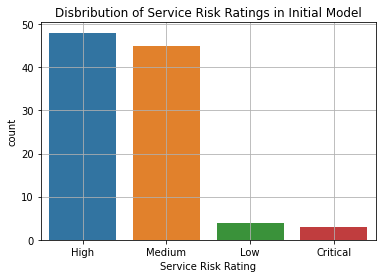

In [130]:
# Distribution of Risk Ratings in the initial model
sns.countplot(program_data['Service Risk Rating'])
plt.title('Disbribution of Service Risk Ratings in Initial Model')
plt.grid()

In [156]:
low = 0
medium = 0
high = 0
critical = 0
for risk_rating in program_data['Service Risk Rating']:
    if risk_rating == 'Low':
        low += 1
    elif risk_rating == 'Medium':
        medium += 1
    elif risk_rating == 'High':
        high += 1
    else:
        critical += 1
        
print('Low: ', low)
print('Medium: ', medium)
print('High: ', high)
print('Critical: ', critical)

Low:  4
Medium:  45
High:  48
Critical:  3


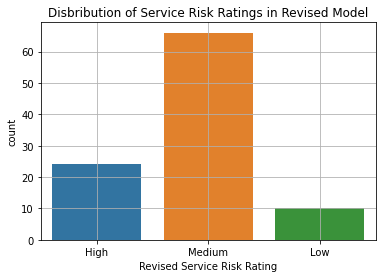

In [131]:
# Distribution of Risk Ratings in the revised model
sns.countplot(revised_scoring_df['Revised Service Risk Rating'])
plt.title('Disbribution of Service Risk Ratings in Revised Model')
plt.grid()

In [158]:
new_low = 0
new_medium = 0
new_high = 0
new_critical = 0
for new_risk_rating in revised_scoring_df['Revised Service Risk Rating']:
    if new_risk_rating == 'Low':
        new_low += 1
    elif new_risk_rating == 'Medium':
        new_medium += 1
    elif new_risk_rating == 'High':
        new_high += 1
    else:
        new_critical += 1
        
print('Low: ', new_low)
print('Medium: ', new_medium)
print('High: ', new_high)
print('Critical: ', new_critical)

Low:  10
Medium:  66
High:  24
Critical:  0


In [132]:
# Identifying contracts for enhanced oversight based on revised risk scoring/rating
enhanced_monitoring = []
for contract_rating in revised_scoring_df['Revised Service Risk Rating']:
    if contract_rating == 'Critical' or contract_rating == 'High':
        enhanced_monitoring.append('Yes')
    else:
        enhanced_monitoring.append('No')
print(enhanced_monitoring)   

['Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes']


In [133]:
revised_scoring_df['Enhanced Monitoring'] = enhanced_monitoring
revised_scoring_df

,Vendor,Service Type,Contract ID,Strategic Risk,Legal and Regulatory Compliance,Financial Risk,Reputational,Information Security,Information Technology,Physical Security,...,KPI Factor,Alternate Vendor Factor,Contract-KPI Compliance Factor,Regulatory Findings Factor,Audit Factor,Assessment Factor,Revised Service Risk Score,Normalized Service Risk Score,Revised Service Risk Rating,Enhanced Monitoring
0,Vend-87,Software Packages,Con-101,4,3,2,2,4,2,4,...,1.25,1.25,1.25,1.25,1.10,1.00,97.200,0.714706,High,Yes
1,Vend-61,Insurance,Con-102,2,4,2,2,4,3,1,...,1.25,1.25,1.25,1.00,1.10,1.00,82.425,0.606066,Medium,No
2,Vend-98,Hardware,Con-103,1,1,2,2,3,2,1,...,1.25,1.00,1.25,1.25,1.15,1.00,64.400,0.473529,Medium,No
3,Vend-54,Mail,Con-104,1,3,2,2,1,1,3,...,1.00,1.00,1.15,1.25,1.15,1.10,61.200,0.450000,Medium,No
4,Vend-70,Technical Consulting,Con-105,1,4,1,2,3,3,3,...,1.00,1.00,1.00,1.25,1.00,1.05,65.700,0.483088,Medium,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Vend-89,Administrative Support,Con-196,2,1,2,3,4,4,4,...,1.25,1.00,1.25,1.25,1.00,1.05,93.600,0.688235,High,Yes
96,Vend-79,Mail,Con-197,2,4,1,1,4,3,2,...,1.00,1.00,1.15,1.10,1.00,1.10,69.825,0.513419,Medium,No
97,Vend-75,Insurance,Con-198,4,2,3,4,2,3,2,...,1.00,1.00,1.10,1.00,1.15,1.05,81.400,0.598529,Medium,No
98,Vend-84,Administrative Support,Con-199,3,2,4,1,2,3,1,...,1.00,1.00,1.00,1.25,1.15,1.10,67.500,0.496324,Medium,No


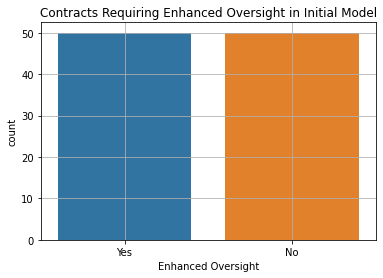

In [134]:
# Distribution of Enhenced Monitoring/Oversight in the initial model
sns.countplot(enhanced_oversight['Enhanced Oversight'])
plt.title('Contracts Requiring Enhanced Oversight in Initial Model')
plt.grid()

In [164]:
yes = 0
no = 0

for eo_count in enhanced_oversight['Enhanced Oversight']:
    if eo_count == 'Yes':
        yes += 1
    else:
        no += 1
print('Yes Count: ', yes)
print('No Count: ', no)

Yes Count:  50
No Count:  50


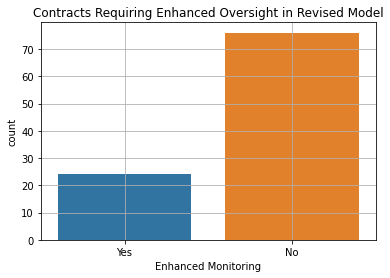

In [135]:
# Distribution of Enhenced Monitoring/Oversight in the initial model
sns.countplot(revised_scoring_df['Enhanced Monitoring'])
plt.title('Contracts Requiring Enhanced Oversight in Revised Model')
plt.grid()

In [165]:
new_yes = 0
new_no = 0

for em_count in revised_scoring_df['Enhanced Monitoring']:
    if em_count == 'Yes':
        new_yes += 1
    else:
        new_no += 1
print('Yes Count: ', new_yes)
print('No Count: ', new_no)

Yes Count:  24
No Count:  76


In [136]:
revised_scoring_df.columns

Index(['Vendor', 'Service Type', 'Contract ID', 'Strategic Risk',
       'Legal and Regulatory Compliance', 'Financial Risk', 'Reputational',
       'Information Security', 'Information Technology', 'Physical Security',
       'Insurance Coverage', 'Service Risk Score', 'Service Risk Rating',
       'Reassessment Status', 'Reassessment Factor', 'KPI Factor',
       'Alternate Vendor Factor', 'Contract-KPI Compliance Factor',
       'Regulatory Findings Factor', 'Audit Factor', 'Assessment Factor',
       'Revised Service Risk Score', 'Normalized Service Risk Score',
       'Revised Service Risk Rating', 'Enhanced Monitoring'],
      dtype='object')

In [137]:
# Define X-independent and y-dependent variables
y_dependent = revised_scoring_df['Enhanced Monitoring']
X_independent = revised_scoring_df[['Strategic Risk', 'Legal and Regulatory Compliance', 'Financial Risk', 'Reputational', 'Information Security', 'Information Technology', 'Physical Security', 'Insurance Coverage', 'Service Risk Score', 'Reassessment Factor', 'KPI Factor', 'Alternate Vendor Factor', 'Contract-KPI Compliance Factor', 'Regulatory Findings Factor', 'Audit Factor', 'Assessment Factor']]

In [138]:
y_dependent.shape, X_independent.shape

((100,), (100, 16))

In [171]:
# Use the train_test_split function to create training and testing subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_independent, 
                                                    y_dependent, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

# Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)

# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

C:\Users\esuba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Prediction,Actual
35,No,No
26,No,No
86,No,No
38,No,No
99,Yes,Yes
12,No,No
46,No,No
31,Yes,No
90,No,No
17,No,No


In [140]:
print(f"Training Data Score: {round(classifier.score(X_train, y_train),2)}")
print(f"Testing Data Score: {round(classifier.score(X_test, y_test),2)}")

Training Data Score: 0.97
Testing Data Score: 0.96


In [141]:
# double check accuracy score
print("Accuracy Score", accuracy_score(y_test, predictions)*100)

Accuracy Score 96.0


In [142]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[21,  1],
       [ 0,  3]], dtype=int64)

In [143]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       1.00      0.95      0.98        22
         Yes       0.75      1.00      0.86         3

    accuracy                           0.96        25
   macro avg       0.88      0.98      0.92        25
weighted avg       0.97      0.96      0.96        25



In [144]:
revised_scoring_df.columns

Index(['Vendor', 'Service Type', 'Contract ID', 'Strategic Risk',
       'Legal and Regulatory Compliance', 'Financial Risk', 'Reputational',
       'Information Security', 'Information Technology', 'Physical Security',
       'Insurance Coverage', 'Service Risk Score', 'Service Risk Rating',
       'Reassessment Status', 'Reassessment Factor', 'KPI Factor',
       'Alternate Vendor Factor', 'Contract-KPI Compliance Factor',
       'Regulatory Findings Factor', 'Audit Factor', 'Assessment Factor',
       'Revised Service Risk Score', 'Normalized Service Risk Score',
       'Revised Service Risk Rating', 'Enhanced Monitoring'],
      dtype='object')

In [145]:
# Write the revised data to MongoDB
# Writing Vendor Risk Scores to MongoDB
for index, row in revised_scoring_df.iterrows():
    #vendor_score_output = index, row[[]]
    #vendor_data = index, row[['Vendor', 'Service Type', 'Contract ID', 'Service Risk Score', 'Service Risk Rating']]
    scoring_model_dict = {'Vendor': row['Vendor'], 'Service Type': row['Service Type'], 'Contract ID': row['Contract ID'], 'Strategic Risk': row['Strategic Risk'], 'Legal and Regulatory Compliance': row['Legal and Regulatory Compliance'], 'Reputational': row['Reputational'], 'Information Security': row['Information Security'], 'Information Technology': row['Information Technology'], 'Physical Security': row['Physical Security'], 'Insurance Coverage': row['Insurance Coverage'], 'Service Risk Score': row['Service Risk Score'], 'Reassessment Factor': row['Reassessment Factor'], 'KPI Factor': row['KPI Factor'], 'Alternate Vendor Factor': row['Alternate Vendor Factor'], 'Contract-KPI Compliance Factor': row['Contract-KPI Compliance Factor'], 'Regulatory Findings Factor': row['Regulatory Findings Factor'], 'Audit Factor': row['Audit Factor'], 'Assessment Factor': row['Assessment Factor'], 'Revised Service Risk Score': row['Revised Service Risk Score'], 'Normalized Service Risk Score': row['Normalized Service Risk Score'], 'Revised Service Risk Rating': row['Revised Service Risk Rating'], 'Enhanced Monitoring': row['Enhanced Monitoring']}
    insert_scoringmodel(scoring_model_dict)
    print(scoring_model_dict)

{'Vendor': 'Vend-87', 'Service Type': 'Software Packages', 'Contract ID': 'Con-101', 'Strategic Risk': 4, 'Legal and Regulatory Compliance': 3, 'Reputational': 2, 'Information Security': 4, 'Information Technology': 2, 'Physical Security': 4, 'Insurance Coverage': 3, 'Service Risk Score': 12.0, 'Reassessment Factor': 1.0, 'KPI Factor': 1.25, 'Alternate Vendor Factor': 1.25, 'Contract-KPI Compliance Factor': 1.25, 'Regulatory Findings Factor': 1.25, 'Audit Factor': 1.1, 'Assessment Factor': 1.0, 'Revised Service Risk Score': 97.19999999999999, 'Normalized Service Risk Score': 0.7147058823529411, 'Revised Service Risk Rating': 'High', 'Enhanced Monitoring': 'Yes', '_id': ObjectId('60b05fc2ab112fe53be3ba93')}
{'Vendor': 'Vend-61', 'Service Type': 'Insurance', 'Contract ID': 'Con-102', 'Strategic Risk': 2, 'Legal and Regulatory Compliance': 4, 'Reputational': 2, 'Information Security': 4, 'Information Technology': 3, 'Physical Security': 1, 'Insurance Coverage': 3, 'Service Risk Score': 10

In [159]:
# Using pandas profiling package to streamline the data
vrm_dataset = pd.read_excel('vrm_program_reporting.xlsx')
vrm_profile = ProfileReport(vrm_dataset)
vrm_profile

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [162]:
# Generate html report
vrm_profile.to_file('vrm_program_data.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [163]:
# Generate pdf report
vrm_profile.to_file('vrm_program_data.pdf')

C:\Users\esuba\anaconda3\lib\site-packages\pandas_profiling\profile_report.py:293: UserWarning:

Extension .pdf not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.



Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [149]:
### Vendor Risk Aggregation and Scoring
### TPRM Lifecycle Management
### Key Risk Indicators Development, Measurement and Monitoring